## Optimized Wait Time At EV Charging Stations In Palo Alto

### Introduction:

The electric vehicle (EV) charging industry is undergoing significant expansion, driven by the increasing adoption of electric vehicles for various compelling reasons. Palo Alto stands as a pioneering city equipped with EV charging stations to accommodate the growing community of EV drivers. These charging stations play a crucial role in curbing greenhouse gas emissions, conserving gasoline, and fostering positive environmental impacts. Additionally, they present lucrative opportunities for business owners.

However, the challenge faced by EV adaptation lies in the extended duration of charging and associated wait times. Many EV drivers lack real-time information about wait periods or the availability of charging stations. Addressing these concerns by developing a solution for predicting wait times and charging durations can immensely benefit EV customers. It would not only save time but also optimize the waiting experience, resulting in a more efficient charging process.

It's noteworthy that the availability of charging stations doesn't necessarily translate to high costs, as numerous stations offer free charging services. Utilizing the provided dataset, our objective is to construct a predictive model that can anticipate the advantages of charging stations for the city of Palo Alto. Access the dataset here to explore the insights derived from the analysis.[Click here to access the dataset](https://www.kaggle.com/code/prasaddevh/eda-evchargingpaloaltoca)

**EDA Summary:**
Original Dataset has 32 columns with 259415 rows. All columns describe important aspect of charging stations located in Palo Alto City. 
If you are not familar with EV charging stations, it is required to know some of the terms like MAC. 

MAC address (Media Access Control address) is a unique identifier assigned to a network interface controller (NIC) for use as a network address in communications within a network segment. It is a hardware address that uniquely identifies each device on a network. 

There are two types of charging port. type 1 and type 2. type 1 charging port is slower than type 2 charging port but it is cheaper and some stations provide free service.

For further details on level 1 and level 2 Type 1 (J1772): This is a standard charging port in North America and Japan. It is also known as SAE J1772.
Type 2 (Mennekes): This is a standard charging port in Europe. It is also known as IEC 62196-2.

EVSE ID use to identify charging location, track, manage and record charging history. It is important column to record all previous charging histories.

Plug type is similar to Port Type. It refers to the type of connector/plug used by EV to connect to a charging station. Different electric vehicles and charging stations may use different plug types, and the choice of plug type depends on factors such as regional standards, vehicle compatibility, and charging infrastructure specifications. At the moment, there are 5 different types of plug/port type available. Most popular one is Tesla upercharger in Palo Alto.


The features considered for the predictive model of total charging duration include:

Fee (varied rates across different stations)
Weekend charging indicator
Weekday charging indicator
Energy usage at charging stations (encompassing greenhouse gas saved and energy usage)
Port type
Port number
Utilizing these features, the model predicts that the total duration to fully charge an electric vehicle is approximately 64 minutes. Notably, the accuracy of both the training and test data surpasses 90%, aligning with expectations given the model's foundation on these features.

Insights from the Linear Regression Model:

The linear regression model adeptly captures a substantial portion of the variability in the target variable.
Additionally, explorations into Ridge and Lasso regression, as well as time series models, were undertaken, although they did not yield significant additional insights.

In [236]:
#data manipulation
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

#statistical modeling
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from datetime import datetime
from watermark import watermark
print(watermark(packages="numpy, pandas,matplotlib, seaborn,scipy,statsmodels"))

numpy      : 1.26.3
 pandas    : not installed
matplotlib : 3.8.0
 seaborn   : not installed
scipy      : 1.11.4
statsmodels: 0.14.0



In [237]:
df = pd.read_csv('/Users/stevekim/Desktop/BrainStationSprintProject/EVChargingStationUsageCali.csv')

/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_78368/927276920.py:1: DtypeWarning:

Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.



In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [4]:
print(df.head())

                 Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1                  7

In [5]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

Column names are too long keep it short and neat

In [6]:
df.rename(columns={'Energy (kWh)' : 'Energy', 'GHG Savings (kg)': "GreenHouseGasSave",
                  'Transaction Date (Pacific Time)':'Transaction Date',
                   'Charging Time (hh:mm:ss)':'Charging Time',
                   'Total Duration (hh:mm:ss)': 'Total Duration',
                   'Gasoline Savings (gallons)': 'Gasoline Savings'
                  }, inplace=True)
print(df.columns)

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date',
       'Total Duration', 'Charging Time', 'Energy', 'GreenHouseGasSave',
       'Gasoline Savings', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Country',
       'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')


In [7]:
df.drop_duplicates()
#Checked duplicate rows and decided to drop the rows.

Station Name          MAC Address  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
...                                ...                  ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A   

                  Org Name        Start Date Start Time Zone  \
0        City of Palo Alto   7/29/2011 20:17             PDT   
1        City of Palo Alto    7/30/2011 0:00             PDT   
2        City of Palo Alto    7/30/2011 8:16             PDT   
3        City of Palo Alto   7/30/2011 14:51             PDT   
4        City of Palo Alto   7/30/2011 18:51             PDT   
...                    ...               ...             ...   
259410  City of Palo Alto   12/31/2020 16:39             PST   
259411  City of Palo Alto   12/31/2020 16:48             PST   
259412  City of Palo Alto   12/31/2020 17:28             PST   
259413  City of Palo Alto   12/31/2020 17:49             PST   
259414  City of Palo Alto   12/31/2020 18:19             PST   

                End Date End Time Zone  Transaction Date Total Duration  \
0        7/29/2011 23:20           PDT   7/29/2011 23:20        3:03:32   
1         7/30/2011 0:02           PDT    7/30/2011 0:02        0:02:06   
2        7/30/2011 12:34           PDT   7/30/2011 12:34        4:17:32   
3        7/30/2011 16:55           PDT   7/30/2011 16:55        2:03:24   
4        7/30/2011 20:03           PDT   7/30/2011 20:03        1:11:24   
...                  ...           ...               ...            ...   
259410  12/31/2020 17:14           PST  12/31/2020 17:16        0:35:44   
259411  12/31/2020 20:31           PST  12/31/2020 20:32        3:43:01   
259412    1/1/2021 10:56           PST    1/1/2021 10:57       17:28:14   
259413  12/31/2020 21:55           PST  12/31/2020 21:56        4:05:34   
259414  12/31/2020 19:01           PST  12/31/2020 19:02        0:42:07   

       Charging Time  ...   Longitude  Currency   Fee             Ended By  \
0            1:54:03  ... -122.160309       USD  0.00  Plug Out at Vehicle   
1            0:01:54  ... -122.160309       USD  0.00             Customer   
2            4:17:28  ... -122.160309       USD  0.00  Plug Out at Vehicle   
3            2:02:58  ... -122.160309       USD  0.00             Customer   
4            0:43:54  ... -122.160309       USD  0.00  Plug Out at Vehicle   
...              ...  ...         ...       ...   ...                  ...   
259410       0:35:18  ... -122.144043       USD  0.42  Plug Out at Vehicle   
259411       2:14:04  ... -122.158272       USD  4.69  Plug Out at Vehicle   
259412       5:08:12  ... -122.113510       USD  6.82  Plug Out at Vehicle   
259413       3:53:42  ... -122.158272       USD  2.75  Plug Out at Vehicle   
259414       0:41:44  ... -122.146034       USD  0.36  Plug Out at Vehicle   

        Plug In Event Id Driver Postal Code  User ID              County  \
0                      3            95124.0   3284.0                 NaN   
1                      4            94301.0   4169.0                 NaN   
2                      5            94301.0   4169.0                 NaN   
3                      6            94302.0   2545.0                 NaN   
4                      7            94043.0   3765.0                 NaN   
...                  ...                ...      ...                 ...   
259410              2369            94301.0  2024201                 NaN   
259411              7255            94541.0   242661  

In [8]:
df.head()
#MAC stands for Media Access Control address, MAC addresses are used as a way to uniquely identify a device on a network at the data link layer of the OSI model

Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date Total Duration Charging Time  ...   Longitude  Currency  \
0  7/29/2011 23:20        3:03:32       1:54:03  ... -122.160309       USD   
1   7/30/2011 0:02        0:02:06       0:01:54  ... -122.160309       USD   
2  7/30/2011 12:34        4:17:32       4:17:28  ... -122.160309       USD   
3  7/30/2011 16:55        2:03:24       2:02:58  ... -122.160309       USD   
4  7/30/2011 20:03        1:11:24       0:43:54  ... -122.160309       USD   

   Fee             Ended By  Plug In Event Id Driver Postal Code  User ID  \
0  0.0  Plug Out at Vehicle                 3            95124.0   3284.0   
1  0.0             Customer                 4            94301.0   4169.0   
2  0.0  Plug Out at Vehicle                 5            94301.0   4169.0   
3  0.0             Customer                 6            94302.0   2545.0   
4  0.0  Plug Out at Vehicle                 7            94043.0   3765.0   

  County System S/N Model Number  
0    NaN        NaN          NaN  
1    NaN        NaN          NaN  
2    NaN        NaN          NaN  
3    NaN        NaN          NaN  
4    NaN        NaN          NaN  

[5 rows x 33 columns]

#### Thus far, we have examined fundamental details about the dataset. Moving forward, our focus will shift towards conducting a more in-depth exploration and analysis through Exploratory Data Analysis

In [ ]:


df = df.drop(columns=['Country','State/Province','Currency'])

Drop columns:
Start Time Zone, End Time Zone. Report base on PDT no need to included in column
Country, State/Province. Report is base on California State no need to include country and state
Currency. No need to include currency 

In [10]:
#Write an utility function to perform basic data quality checks

def basic_check(df):
    """
    should return Number of rows, Number of columns, Missing values,
    Duplicated columns, Duplicated rows
    """
    
    #take a look at the shape of dataset
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')
    
    #take a look at the unique datatypes:
    print(f'Unique datatypes: {list(df.dtypes.unique())}')
    
    #check for missing values
    print(f'Missing values: {df.isnull().sum().any()}')
    
    #check for duplicates
    print(f'Duplicated columns: {df.T.duplicated().any()}')
    
    #row-level duplicates
    print(f'Duplicated rows: {df.duplicated().any()}')

In [280]:
#More sanity check
basic_check(df)

There are 259415 rows and 30 columns in the dataset.
Unique datatypes: [dtype('O'), dtype('float64'), dtype('int64')]
Missing values: True
Duplicated columns: False
Duplicated rows: True


In [9]:
df[df.duplicated] #this is okay therefore will not drop this rows

Station Name          MAC Address            Org Name  \
32434      PALO ALTO CA / MPL #6     000D6F00015B7509  City of Palo Alto    
108236    PALO ALTO CA / HIGH #2  0024:B100:0002:5959  City of Palo Alto    
109967  PALO ALTO CA / BRYANT #2  000D:6F00:009D:CFC3  City of Palo Alto    
206765  PALO ALTO CA / BRYANT #5  0024:B100:0002:6D51  City of Palo Alto    

             Start Date Start Time Zone         End Date End Time Zone  \
32434   2/25/2015 15:24             PST  2/25/2015 15:46           PST   
108236  2/27/2017 11:14             PST  2/27/2017 14:17           PST   
109967  3/10/2017 14:07             PST  3/10/2017 15:53           PST   
206765   4/29/2019 8:10             PDT   4/29/2019 9:09           PDT   

       Transaction Date Total Duration Charging Time  ...   Longitude  \
32434   2/25/2015 15:46        0:22:23       0:22:10  ... -122.113457   
108236  2/27/2017 14:17        3:02:42       2:33:45  ... -122.163017   
109967  3/10/2017 15:53        1:46:01       1:24:31  ... -122.162140   
206765   4/29/2019 9:10        0:59:06       0:57:54  ... -122.162231   

        Currency   Fee             Ended By  Plug In Event Id  \
32434        USD  0.00  Plug Out at Vehicle               469   
108236       USD  0.00  Plug Out at Vehicle        1488222853   
109967       USD  0.00             Customer              9453   
206765       USD  1.33  Plug Out at Vehicle              3413   

       Driver Postal Code    User ID              County    System S/N  \
32434             95134.0   318799.0                 NaN           NaN   
108236            94301.0     738281  Santa Clara County  1.640410e+11   
109967            94065.0     548777  Santa Clara County  1.023100e+11   
206765            94027.0  4516921.0  Santa Clara County  1.707410e+11   

         Model Number  
32434             NaN  
108236      CT4020-HD  
109967  CT2100-HD-CCR  
206765      CT4020-HD  

[4 rows x 33 columns]

In [10]:
df.describe().T
#Univartriate Analysis
#This dataset contains only numerical values
#Summary statistic

count          mean           std           min  \
Energy              259415.0  8.544277e+00  7.185462e+00  1.000000e-02   
GreenHouseGasSave   259415.0  3.588596e+00  3.017894e+00  4.000000e-03   
Gasoline Savings    259415.0  1.072306e+00  9.017761e-01  1.000000e-03   
Port Number         259415.0  1.591627e+00  4.915337e-01  1.000000e+00   
EVSE ID             180467.0  1.462973e+05  2.429677e+05  3.792000e+03   
Postal Code         259415.0  9.430232e+04  1.941657e+00  9.430100e+04   
Latitude            259415.0  3.743956e+01  9.621170e-03  3.742210e+01   
Longitude           259415.0 -1.221513e+02  1.538203e-02 -1.221632e+02   
Fee                 259415.0  1.097481e+00  1.934408e+00  0.000000e+00   
Plug In Event Id    259415.0  1.188685e+08  4.057750e+08  1.000000e+00   
Driver Postal Code  251013.0  9.417031e+04  4.249837e+03  1.013000e+03   
System S/N          180467.0  1.443790e+11  2.483280e+10  1.023100e+11   

                             25%           50%           75%           max  
Energy              3.784000e+00  6.868634e+00  1.145834e+01  9.736000e+01  
GreenHouseGasSave   1.589000e+00  2.885000e+00  4.813000e+00  4.089100e+01  
Gasoline Savings    4.750000e-01  8.620000e-01  1.438000e+00  1.221900e+01  
Port Number         1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  
EVSE ID             4.358300e+04  1.074270e+05  1.745590e+05  5.535441e+06  
Postal Code         9.430100e+04  9.430100e+04  9.430300e+04  9.430600e+04  
Latitude            3.742832e+01  3.744449e+01  3.744661e+01  3.744938e+01  
Longitude          -1.221622e+02 -1.221583e+02 -1.221457e+02 -1.221125e+02  
Fee                 0.000000e+00  0.000000e+00  1.640000e+00  8.456000e+01  
Plug In Event Id    1.573000e+03  3.573000e+03  6.340000e+03  1.609436e+09  
Driver Postal Code  9.408700e+04  9.430400e+04  9.480400e+04  9.935400e+04  
System S/N          1.231100e+11  1.427410e+11  1.705410e+11  2.002410e+11

In [11]:
#replace and fix grammar mistakes 
df['Station Name'] = df['Station Name'].str.replace('PALO ALTO CA /','')
df['Station Name'].value_counts()


Station Name
 HAMILTON #2        23721
 HAMILTON #1        14888
 WEBSTER #1         14432
 BRYANT #2          14389
 HIGH #4            13898
 BRYANT #1          13436
 WEBSTER #2         12669
 CAMBRIDGE #1       11163
 HIGH #1            10756
 WEBSTER #3         10484
 TED THOMPSON #1     9814
 CAMBRIDGE #2        9256
 MPL #6              8996
 HIGH #3             8317
 MPL #4              7787
 MPL #5              7544
 HIGH #2             6930
 RINCONADA LIB 3     6499
 RINCONADA LIB 1     6212
 BRYANT #6           5857
 RINCONADA LIB 2     5553
 BRYANT #5           5332
 CAMBRIDGE #5        4556
 CAMBRIDGE #3        4476
 BRYANT #3           4475
 BRYANT #4           3598
 CAMBRIDGE #4        3428
 TED THOMPSON #3     2455
 TED THOMPSON #4     2226
 TED THOMPSON #2     2217
 MPL #2              1535
 MPL #3              1420
 MPL #1              1044
 BRYANT # 1            13
 SHERMAN 3              8
 SHERMAN 1              7
 SHERMAN 2              4
 SHERMAN 4              4

In [14]:
df['Station Name'] = df['Station Name'].replace({'BRYANT # 1': 'BRYANT #1'})

In [15]:
#replace and fix grammar mistakes
df['Address 1'] = df['Address 1'].replace({'Bryant St' : '445 Bryant St','528 High St.':'528 high st','500-532 Webster St':'532 Webster St'})

In [16]:
df['Address 1'].value_counts()

Address 1
445 Bryant St          47100
250 Hamilton Ave       38609
528 High St            37836
3700 Middlefield Rd    28326
520 Webster St         25173
475 Cambridge Ave      20230
275 Cambridge Ave      16712
400 Cambridge Ave      12649
532 Webster St         12382
1213 Newell Rd         12249
1520 Walnut Dr          3845
1514 Walnut Dr          2170
528 high st             2065
350 Sherman Ave           34
520 Cowper St             19
533 Cowper St             11
358 Sherman Ave            5
Name: count, dtype: int64

In [21]:

#Convert columns TotalDuration and charging time to seconds

df['Total Duration'] = pd.to_timedelta(df['Total Duration']).dt.total_seconds()
df['Charging Time'] = pd.to_timedelta(df['Charging Time']).dt.total_seconds()
df['TimeAfterCharged'] = (df['Total Duration'] - df['Charging Time']) / 60

#convert start year by year in order to calculate other necessary calculation
df['ByYear'] = pd.to_datetime(df['Start Date']).dt.year




In [22]:
df['Postal Code'].value_counts()

Postal Code
94301    163195
94306     49630
94303     46590
Name: count, dtype: int64

Side note, Postal codes 94301, 94303, and 94306, among California's wealthiest areas, are surrounded by notable attractions including Stanford University, nearby national parks, and cultural landmarks such as the Palo Alto Museum and Zoo.

In [23]:
df.groupby(['Address 1','Postal Code'])['Charging Time'].mean()/60
#Find the mean of charging time per address and postal code 
#convert back to minute for convenient readiblity

Address 1            Postal Code
1213 Newell Rd       94303          126.926699
1514 Walnut Dr       94303          111.107373
1520 Walnut Dr       94303          114.623853
250 Hamilton Ave     94301          122.241453
275 Cambridge Ave    94306          133.946119
350 Sherman Ave      94306          142.020588
358 Sherman Ave      94306          168.450000
3700 Middlefield Rd  94303          113.881894
400 Cambridge Ave    94306          120.582837
445 Bryant St        94301          121.911465
475 Cambridge Ave    94306           98.998435
520 Cowper St        94301          132.088596
520 Webster St       94301          126.352806
528 High St          94301          114.994926
528 high st          94301          120.384487
532 Webster St       94301          132.109344
533 Cowper St        94301          132.372727
Name: Charging Time, dtype: float64

In [24]:
avgTimeBy_St = df.groupby(['Station Name', 'Address 1'])['Charging Time'].mean() / 60
avgTimeBy_St.sort_values(ascending=False)
#changing it to minute 
#average charging time by station


Station Name      Address 1          
 SHERMAN 8        350 Sherman Ave        342.808333
 SHERMAN 7        358 Sherman Ave        192.383333
 SHERMAN 11       350 Sherman Ave        177.800000
 SHERMAN 1        350 Sherman Ave        175.871429
 SHERMAN 3        350 Sherman Ave        146.033333
 TED THOMPSON #2  275 Cambridge Ave      143.128695
 TED THOMPSON #1  275 Cambridge Ave      133.374890
 WEBSTER #2       532 Webster St         133.338010
 TED THOMPSON #4  275 Cambridge Ave      132.406020
 WEBSTER #3       533 Cowper St          132.372727
                  520 Cowper St          132.088596
 WEBSTER #1       532 Webster St         130.913187
 TED THOMPSON #3  275 Cambridge Ave      129.333707
 RINCONADA LIB 1  1213 Newell Rd         129.125982
 BRYANT #4        445 Bryant St          128.636900
 RINCONADA LIB 2  1213 Newell Rd         128.104617
 WEBSTER #1       520 Webster St         127.152807
 WEBSTER #2       520 Webster St         126.688653
 WEBSTER #3       520 Webs

Charging Station SHERMAN 8 350 Sherman Ave located Standford University. It has the highest average charging mean time

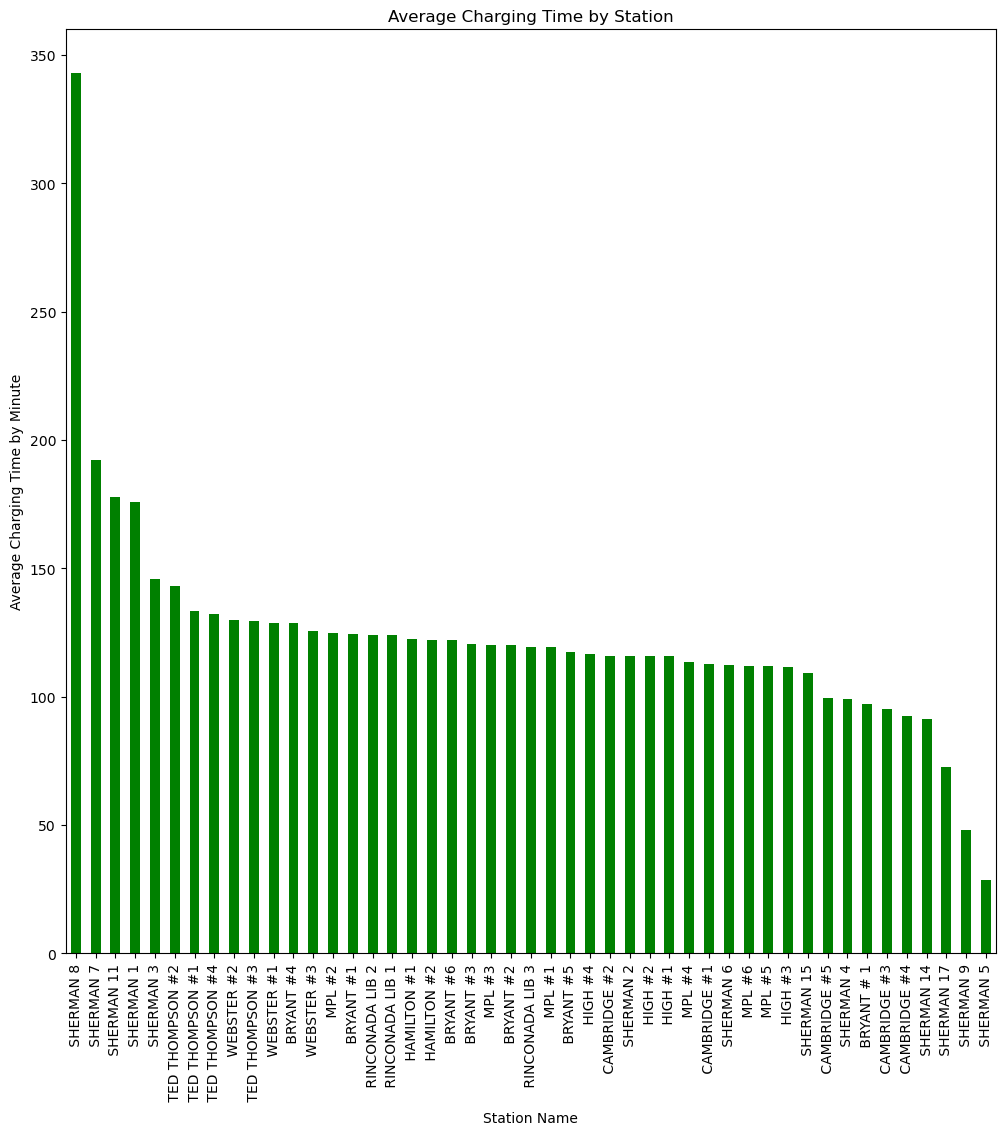

In [25]:
#create histogram to show 
plt.figure(figsize = (12,12))
avgPerStation = df.groupby('Station Name')['Charging Time'].mean()/60 #convert back to minute fore readablity
avgPerStations = avgPerStation.sort_values(ascending=False)
avgPerStations.plot(kind='bar', color='green')
plt.title('Average Charging Time by Station')
plt.xlabel('Station Name')
plt.ylabel('Average Charging Time by Minute')
plt.show()

Average time of Sherman 8 station is 342.808333 and address is 350 Sherman Ave.

Dec 20 EDA process


In [26]:
df['Station Name'] = df['Station Name'].str.replace('BRYANT # 1', 'BRYANT #1')

In [27]:
#Create column for overall fee for charging at the station
df['Total_Amount_For_Charging']  = df['Fee'] * df['Charging Time']

In [28]:
#I wanted to calculate the total amount but still need to work on it
total_amount_by_year = df.groupby(['Station Name', 'ByYear'])['Total_Amount_For_Charging'].sum() / df.groupby('Station Name')['ByYear'].nunique()
total_amount_by_year 

Station Name  ByYear
 BRYANT #1    2011      0.000000e+00
              2012      0.000000e+00
              2013      0.000000e+00
              2014      0.000000e+00
              2015      0.000000e+00
                            ...     
 WEBSTER #3   2016      0.000000e+00
              2017      3.270808e+06
              2018      8.311808e+06
              2019      1.016438e+07
              2020      5.872740e+06
Length: 204, dtype: float64

Total charging fee accumulate over 9 years

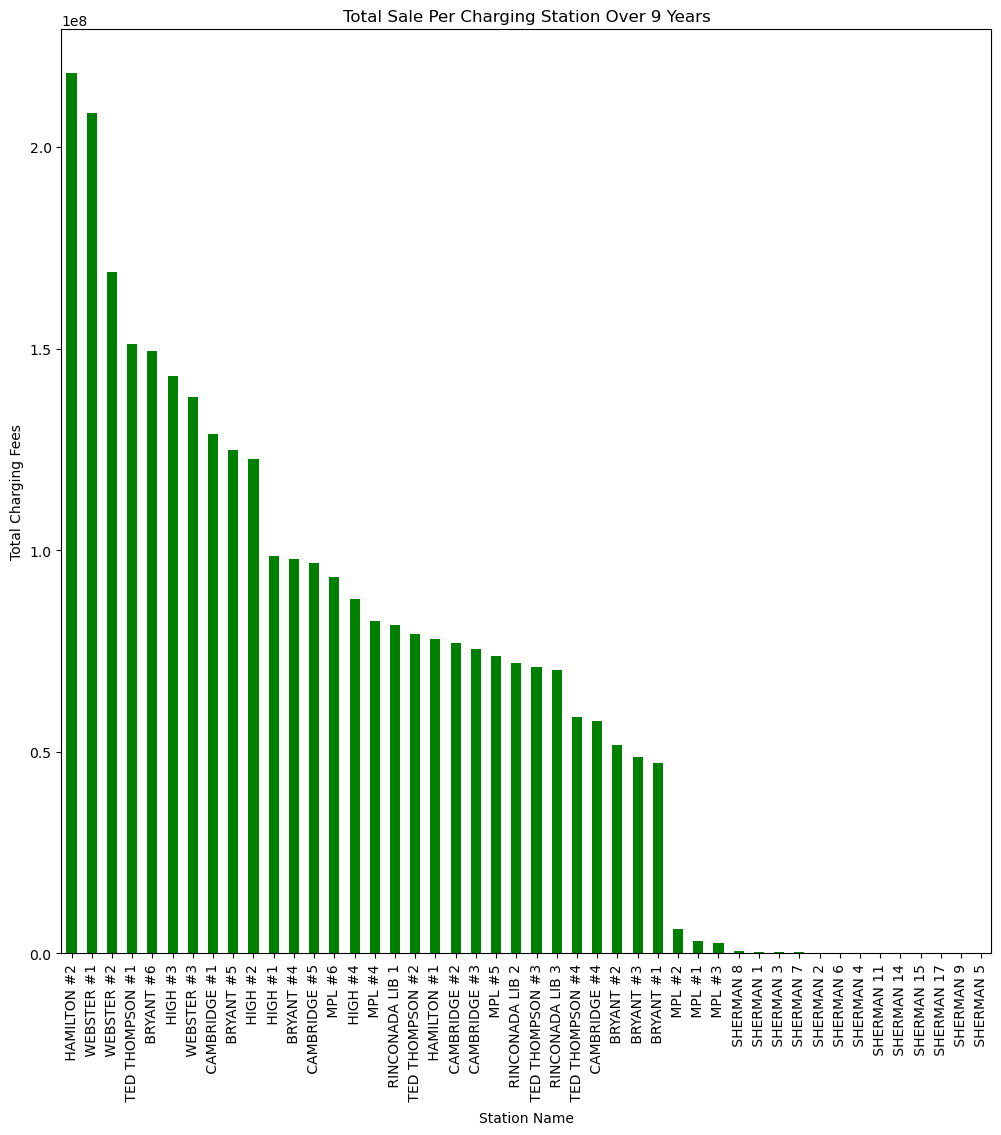

In [29]:
#create histogram and see which station has highest 
plt.figure(figsize=(12,12))
totalAmount = df.groupby('Station Name')['Total_Amount_For_Charging'].sum()
total_Amount = totalAmount.sort_values(ascending=False)
total_Amount.plot(kind='bar', color = 'green')
plt.title('Total Sale Per Charging Station Over 9 Years')
plt.xlabel('Station Name')
plt.ylabel('Total Charging Fees')
plt.show()

#Again break this down to month and year

#### EV Charging Stations is still very niche market. Despite expansion of EV industry does not mean commercial charging stations have good revenue. Majority of charging stations were free until 2017.

In [30]:
df['County'].value_counts()

County
Santa Clara County    147263
San Mateo County       27487
Name: count, dtype: int64

In [31]:
df['County'].isna().sum()

84665

In [32]:
#This is overall sum of fees on all stations and location
df.groupby(['Station Name','Address 1'])['Fee'].sum()
#Problem need to fix ask Stephen for further details

Station Name      Address 1          
 BRYANT #1        445 Bryant St           4533.72
 BRYANT #2        445 Bryant St           4990.83
 BRYANT #3        445 Bryant St           4405.75
 BRYANT #4        445 Bryant St           9128.43
 BRYANT #5        445 Bryant St          12248.09
 BRYANT #6        445 Bryant St          13823.15
 CAMBRIDGE #1     400 Cambridge Ave       2615.48
                  475 Cambridge Ave       9306.56
 CAMBRIDGE #2     400 Cambridge Ave       2380.50
                  475 Cambridge Ave       5477.47
 CAMBRIDGE #3     475 Cambridge Ave       7956.90
 CAMBRIDGE #4     475 Cambridge Ave       6476.15
 CAMBRIDGE #5     475 Cambridge Ave       9320.19
 HAMILTON #1      250 Hamilton Ave        7742.34
 HAMILTON #2      250 Hamilton Ave       20964.32
 HIGH #1          528 High St            10275.88
 HIGH #2          528 High St            12352.17
                  528 high st                0.00
 HIGH #3          528 High St            14752.21
            

In [33]:
#All the address location with free charging stations
df[df['Fee'] == 0]['Address 1'].unique()

array(['250 Hamilton Ave', '528 High St', '445 Bryant St',
       '3700 Middlefield Rd', '1520 Walnut Dr', '1514 Walnut Dr',
       '532 Webster St', '275 Cambridge Ave', '400 Cambridge Ave',
       '520 Webster St', '1213 Newell Rd', '528 high st', '533 Cowper St',
       '520 Cowper St', '475 Cambridge Ave'], dtype=object)

In [34]:
df[df['Fee']== 0]['Fee'].count()

133538

There are still many charging stations offered free charging however, often free charging stations have problems such as broken equipment and longer wait time for EV owners.

In [36]:
crossT = pd.crosstab(index = df['Station Name'], columns = df['Port Type'], values = df['Fee'],aggfunc = 'mean')

In [37]:
crossT

Port Type          Level 1    Level 2
Station Name                         
 BRYANT #1        0.003362   0.379347
 BRYANT #2        0.003227   0.383448
 BRYANT #3        0.007059   1.011228
 BRYANT #4             NaN   2.537084
 BRYANT #5             NaN   2.297091
 BRYANT #6             NaN   2.360108
 CAMBRIDGE #1          NaN   1.067996
 CAMBRIDGE #2          NaN   0.848960
 CAMBRIDGE #3          NaN   1.777681
 CAMBRIDGE #4          NaN   1.889192
 CAMBRIDGE #5          NaN   2.045696
 HAMILTON #1      0.015895   0.538142
 HAMILTON #2      0.000000   0.893620
 HIGH #1               NaN   0.955363
 HIGH #2               NaN   1.782420
 HIGH #3               NaN   1.773742
 HIGH #4          0.000000   0.698127
 MPL #1                NaN   0.255584
 MPL #2                NaN   0.286039
 MPL #3                NaN   0.253275
 MPL #4                NaN   0.921058
 MPL #5                NaN   0.860172
 MPL #6                NaN   0.935238
 RINCONADA LIB 1  0.000000   0.840047
 RINCONADA LIB 2  0.076400   0.818365
 RINCONADA LIB 3  0.343333   0.794523
 SHERMAN 1             NaN   3.690000
 SHERMAN 11            NaN   3.950000
 SHERMAN 14            NaN   2.110000
 SHERMAN 15            NaN   2.520000
 SHERMAN 17            NaN   1.560000
 SHERMAN 2             NaN   2.747500
 SHERMAN 3             NaN   2.950000
 SHERMAN 4             NaN   1.320000
 SHERMAN 5             NaN   0.330000
 SHERMAN 6             NaN   2.580000
 SHERMAN 7             NaN   4.525000
 SHERMAN 8             NaN  11.390000
 SHERMAN 9             NaN   1.130000
 TED THOMPSON #1       NaN   1.340854
 TED THOMPSON #2       NaN   2.846946
 TED THOMPSON #3       NaN   2.523642
 TED THOMPSON #4       NaN   2.467120
 WEBSTER #1            NaN   1.308877
 WEBSTER #2            NaN   1.229076
 WEBSTER #3            NaN   1.246295

Level one charging stations is slower and less time efficient than level 2 charging stations. It is not recommend for those who wants to save their time and pay for better service

In [38]:
df[df['Fee'] > 0]['Station Name'].unique()

array([' CAMBRIDGE #2', ' HAMILTON #2', ' WEBSTER #1', ' HAMILTON #1',
       ' HIGH #3', ' RINCONADA LIB 1', ' MPL #5', ' WEBSTER #3',
       ' BRYANT #3', ' BRYANT #6', ' TED THOMPSON #1', ' CAMBRIDGE #1',
       ' MPL #4', ' MPL #3', ' HIGH #2', ' HIGH #4', ' BRYANT #5',
       ' BRYANT #4', ' HIGH #1', ' BRYANT #2', ' RINCONADA LIB 2',
       ' RINCONADA LIB 3', ' MPL #6', ' BRYANT #1', ' WEBSTER #2',
       ' MPL #2', ' MPL #1', ' CAMBRIDGE #5', ' TED THOMPSON #3',
       ' TED THOMPSON #4', ' TED THOMPSON #2', ' CAMBRIDGE #3',
       ' CAMBRIDGE #4', ' SHERMAN 6', ' SHERMAN 7', ' SHERMAN 9',
       ' SHERMAN 8', ' SHERMAN 4', ' SHERMAN 1', ' SHERMAN 3',
       ' SHERMAN 14', ' SHERMAN 2', ' SHERMAN 5', ' SHERMAN 15',
       ' SHERMAN 11', ' SHERMAN 17'], dtype=object)

In [39]:
df['Driver Postal Code'].value_counts()

Driver Postal Code
94301.0    25032
94303.0    22561
94306.0    21573
94025.0    11581
94043.0     7541
           ...  
92630.0        1
47906.0        1
6830.0         1
93536.0        1
63301.0        1
Name: count, Length: 985, dtype: int64

Many NaN values on County 
Need to fill it up with actual county names

In [40]:
df['County'].value_counts()

County
Santa Clara County    147263
San Mateo County       27487
Name: count, dtype: int64

In [1]:
df['County'].isna().sum()


NameError: name 'df' is not defined

There are 84665 NaN values in County column

#GHG (Greenhouse Gas) savings, measured in kilograms (kg), refers to the reduction in the emission of greenhouse gases that would have occurred as a result of implementing a particular action, process, or technology



445 Bryant St is parking lot building where Tesla supercharger and other super charging stations available.	It saved ovearall 162.667532

In [43]:
gs = df.groupby('Address 1').agg({'Gasoline Savings': 'sum', 'ByYear': 'first'}).reset_index()
gs['Gasoline Savings'] = gs['Gasoline Savings'] / gs['ByYear']
gs = gs.sort_values(by=['ByYear', 'Gasoline Savings'], ascending=[True, False]).reset_index(drop=True)
gs
# Gas Saved goes by KG

Address 1  Gasoline Savings  ByYear
0         445 Bryant St         24.170334    2011
1           528 High St         20.477242    2011
2      250 Hamilton Ave         19.062278    2011
3   3700 Middlefield Rd         15.267454    2014
4        532 Webster St          7.570594    2015
5        1520 Walnut Dr          1.952445    2015
6        1514 Walnut Dr          1.087224    2015
7        520 Webster St         15.044005    2016
8     275 Cambridge Ave         10.065208    2016
9        1213 Newell Rd          7.651955    2016
10    400 Cambridge Ave          5.453336    2016
11          528 high st          1.143796    2017
12        520 Cowper St          0.010285    2017
13        533 Cowper St          0.007104    2017
14    475 Cambridge Ave          9.155415    2018
15      350 Sherman Ave          0.027002    2020
16      358 Sherman Ave          0.005296    2020

Year 2020 is lowest year in terms of gasoline savings because pandemic.

Gasoline saved by charging stations is not very relevant information as everyone aware that gasoline is not used at EV charging stations. However, this information can be used for policy maker who wants to know how much gasoline can be saved and what how is alternated energy are being used in the city.

In [44]:
df['ByYear'] = pd.to_datetime(df['Start Date']).dt.year
#convert start year by year in order to calculate other necessary calculation

In [45]:
ghgby = df.groupby(['ByYear','Address 1'])['GreenHouseGasSave'].sum()
ghgby

ByYear  Address 1          
2011    250 Hamilton Ave        2423.841
        445 Bryant St            654.264
        528 High St              436.490
2012    250 Hamilton Ave        7818.865
        445 Bryant St           6970.995
                                 ...    
2020    3700 Middlefield Rd     7887.011
        445 Bryant St          10606.513
        475 Cambridge Ave      15686.857
        520 Webster St         13371.518
        528 High St            12705.758
Name: GreenHouseGasSave, Length: 70, dtype: float64

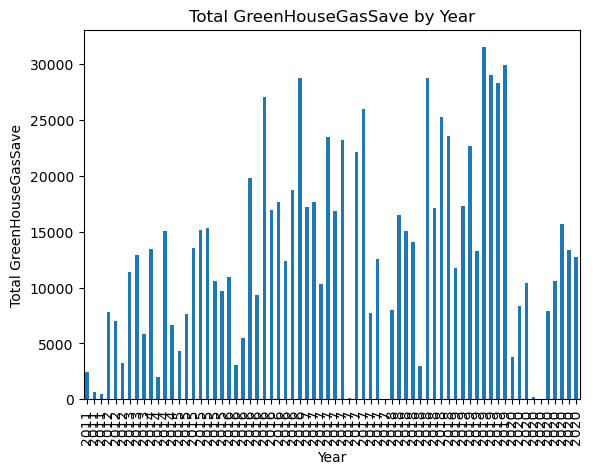

In [46]:
#GHG saved by address per year
ghgby_df = ghgby.reset_index()
ghgby_df.plot(kind='bar', x='ByYear', y='GreenHouseGasSave', legend=False)

plt.xlabel('Year')
plt.ylabel('Total GreenHouseGasSave')
plt.title('Total GreenHouseGasSave by Year')
plt.show()

Graph indicates greenhouse gas (CO2) saved where charging stations located by year. 

In [2]:
postal_code = df.groupby(['ByYear','Postal Code'])['GreenHouseGasSave'].sum()
postal_code

NameError: name 'df' is not defined

In [48]:
ghg = df.groupby('Address 1').agg({'GreenHouseGasSave': 'sum', 'ByYear': 'first'}).reset_index()
ghg['GreenHouseGasSave'] = ghg['GreenHouseGasSave'] / ghg['ByYear']
ghg = ghg.sort_values(by=['ByYear', 'GreenHouseGasSave'], ascending=[True, False]).reset_index(drop=True)
print(ghg)
# GHG goes by KG

              Address 1  GreenHouseGasSave  ByYear
0         445 Bryant St          80.888877    2011
1           528 High St          68.529560    2011
2      250 Hamilton Ave          63.794180    2011
3   3700 Middlefield Rd          51.094332    2014
4        532 Webster St          25.335725    2015
5        1520 Walnut Dr           6.534065    2015
6        1514 Walnut Dr           3.638538    2015
7        520 Webster St          50.346534    2016
8     275 Cambridge Ave          33.684294    2016
9        1213 Newell Rd          25.608208    2016
10    400 Cambridge Ave          18.250204    2016
11          528 high st           3.827858    2017
12        520 Cowper St           0.034419    2017
13        533 Cowper St           0.023772    2017
14    475 Cambridge Ave          30.639570    2018
15      350 Sherman Ave           0.090359    2020
16      358 Sherman Ave           0.017725    2020


In [49]:
df['byWeek'] = pd.to_datetime(df['Start Date']).dt.day_name()
df['weekend'] = df['byWeek'].isin(['Saturday','Sunday'])
df['weekday'] = df['byWeek'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
#Convert columns TotalDuration and charging time to seconds




In [50]:
#usage of charging stations during week days and weekends
CT_by_week = df.groupby('byWeek')['Charging Time'].size().reset_index().sort_values(by='byWeek', ascending=False).reset_index(drop=True)
CT_by_week

byWeek  Charging Time
0  Wednesday          40483
1    Tuesday          39578
2   Thursday          40189
3     Sunday          29626
4   Saturday          32264
5     Monday          36853
6     Friday          40422

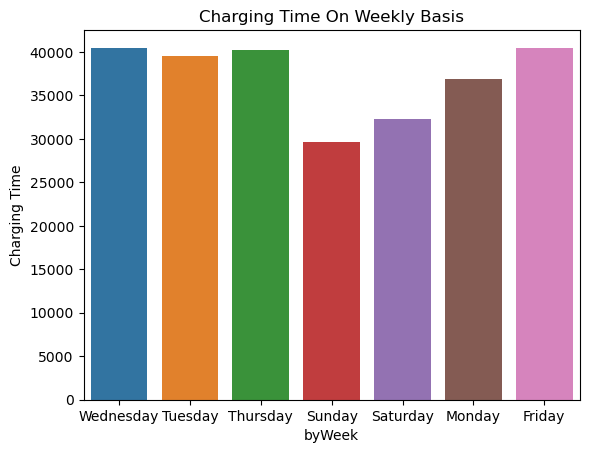

In [51]:
sns.barplot(data=CT_by_week, y ='Charging Time',x = 'byWeek',order=CT_by_week['byWeek'])
plt.title('Charging Time On Weekly Basis')
plt.show()

Possible trend is charge EV during Wednesday, Thursday and Friday and use it during Weekend and Monday.


Almost all charging stations have wait time unlike petroleum gas stations where often do not wait. This problem can be optimized if users can get real time information regarding wait time. For instance, if you want to go charge your EV during Friday evening you can check the app and see which charging stations has lowest wait time. 

In [52]:
#usage of charging stations during week days and weekends
CT_by_weekday = df.groupby('weekday')['Charging Time'].size().reset_index().sort_values(by='Charging Time', ascending=False).reset_index(drop=True)
CT_by_weekday.replace({True: 'Weekday', False: 'Weekend'})
CT_by_weekday

weekday  Charging Time
0     True         197525
1    False          61890

Text(0.5, 1.0, 'Charging Time During Weekdays and Weekends')

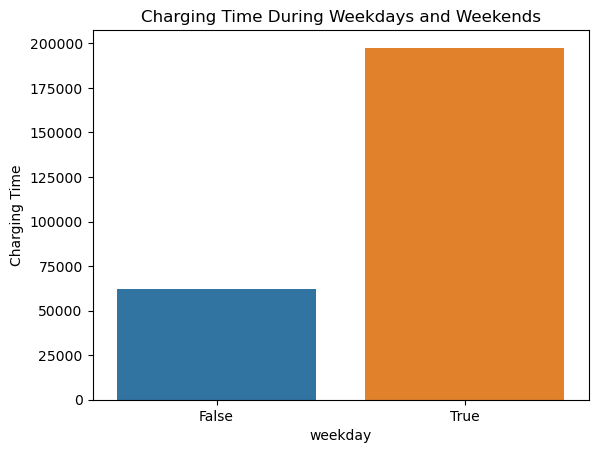

In [53]:
sns.barplot(data=CT_by_weekday, y ='Charging Time',x = 'weekday')
plt.title('Charging Time During Weekdays and Weekends')


#### Summary:
Overall, in terms of EDA some columns have been dropped, and others have been adjusted for analysis purposes. The process is not yet complete, and further analysis will be conducted. The ultimate goal is to understand how each column impacts the others.

In [56]:
# create new table to test out 
df1 = df.drop(columns=['MAC Address','Start Time Zone'])

Target variable is total duration time and feature varables does not include mac address and start time zone. Therefore, let's drop the features.

In [57]:
#df['byWeek'] = pd.to_datetime(df['Start Date']).dt.day_name()
#df['weekend'] = df['byWeek'].isin(['Saturday','Sunday'])
#df['weekday'] = df['byWeek'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
#Convert columns TotalDuration and charging time to seconds

#df['Total Duration'] = pd.to_timedelta(df['Total Duration']).dt.total_seconds()
#df['Charging Time'] = pd.to_timedelta(df['Charging Time']).dt.total_seconds()
#df['TimeAfterCharged'] = (df['Total Duration'] - df['Charging Time']) / 60

#convert start year by year in order to calculate other necessary calculation
#df['ByYear'] = pd.to_datetime(df['Start Date']).dt.year

In [58]:
df1['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

In [59]:
df1['day_name'] = pd.to_datetime(df1['End Date']).dt.day_name()


In [60]:
df1['day_name']

0           Friday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
259410    Thursday
259411    Thursday
259412      Friday
259413    Thursday
259414    Thursday
Name: day_name, Length: 259415, dtype: object

In [61]:
#for now lets drop System S/N and Model Number columns because it does not have relevant information I need

#df1.drop(columns=['System S/N', 'Model Number'], inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


In [63]:
#transform station name as unique label and sum up total and see how many stations are there and organizations are there

df1['Station Name_test'] = label_encoder.fit_transform(df['Station Name'])
df1['Org Name_test'] = label_encoder.fit_transform(df['Org Name'])


In [64]:
df1['Port Type_test'] = label_encoder.fit_transform(df['Port Type'])


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
df1['weekday'] = df1['weekday'].astype(int)

In [67]:
df1['weekend'] = df1['weekend'].astype(int)

In [68]:
df1.head()

Station Name           Org Name       Start Date            End Date  \
0   HAMILTON #1  City of Palo Alto  7/29/2011 20:17 2011-07-29 23:20:00   
1   HAMILTON #1  City of Palo Alto   7/30/2011 0:00 2011-07-30 00:02:00   
2   HAMILTON #1  City of Palo Alto   7/30/2011 8:16 2011-07-30 12:34:00   
3   HAMILTON #1  City of Palo Alto  7/30/2011 14:51 2011-07-30 16:55:00   
4   HAMILTON #1  City of Palo Alto  7/30/2011 18:51 2011-07-30 20:03:00   

  End Time Zone Transaction Date  Total Duration  Charging Time     Energy  \
0           PDT  7/29/2011 23:20         11012.0         6843.0   6.249457   
1           PDT   7/30/2011 0:02           126.0          114.0   0.106588   
2           PDT  7/30/2011 12:34         15452.0        15448.0  14.951777   
3           PDT  7/30/2011 16:55          7404.0         7378.0   7.159643   
4           PDT  7/30/2011 20:03          4284.0         2634.0   1.957765   

   GreenHouseGasSave  ...  ByYear TimeAfterCharged  Total_Amount_For_Charging  \
0              2.625  ...    2011        69.483333                        0.0   
1              0.045  ...    2011         0.200000                        0.0   
2              6.280  ...    2011         0.066667                        0.0   
3              3.007  ...    2011         0.433333                        0.0   
4              0.822  ...    2011        27.500000                        0.0   

     byWeek  weekend weekday  day_name Station Name_test  Org Name_test  \
0    Friday        0       1    Friday                11              0   
1  Saturday        1       0  Saturday                11              0   
2  Saturday        1       0  Saturday                11              0   
3  Saturday        1       0  Saturday                11              0   
4  Saturday        1       0  Saturday                11              0   

  Port Type_test  
0              1  
1              1  
2              1  
3              1  
4              1  

[5 rows x 41 columns]


Previously, I lacked a clear direction for my dataset analysis. Following preprocessing, I determined the goal of employing regression models to predict energy consumption in three distinct postal codes within Palo Alto over a 10-year period. Despite grouping essential features by postal code on both daily and monthly bases, the regression models yielded poor performance, even when simplifying the task to predicting energy consumption based on the initial four energy-related columns. Consequently, I opted to explore the potential improvements offered by confusion matrices and scaling the existing data.

In this notebook, our focus will be on logistic regression, with an emphasis on optimizing the model through various methods. The primary objective is to leverage historical data to learn patterns and construct a time series model that enhances predictive capabilities.

## Data Dictionary

| **Feature**  | **Description**                                                                                                                                                                                                                             |
|----------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Charging Time      | Distributed in average value                                                                                                                                                                                                                            |
| Postal Code      | 94301, 94302,94306                                                                                                                                                                                                                   |
| GreenHouseGasSave (kg)      | Kg                                                                                                                                    |
| Energy Consumption (kWh) | Distributed in total sum                                                                                                                                                                          |
| Gasoline Savings (gal)     | Distributed in total sum                                                                                                                                                                         

### EDA

The dataset we've loaded is the same as in Sprint 1; however, for Sprint 2 model building, I've created a new dataset, df1. In this dataset, I've performed grouping for columns related to energy consumption. Additionally, I've crafted a straightforward time series model utilizing 'GreenHouseGasSaved (kg)' and 'Gasoline Savings (gal)'.

In [70]:
# 'Transaction Date' is converted to datetime format
df1['Transaction Date'] = pd.to_datetime(df1['Transaction Date'], format='%m/%d/%Y %H:%M', errors='coerce')

mask = df1['Transaction Date'].isna()
if mask.any():
    pass

#change it to %Y-%m-%d format
df1['Transaction Date'] = df1['Transaction Date'].dt.strftime('%Y-%m-%d')


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Station Name               259415 non-null  object        
 1   Org Name                   259415 non-null  object        
 2   Start Date                 259415 non-null  object        
 3   End Date                   259375 non-null  datetime64[ns]
 4   End Time Zone              259415 non-null  object        
 5   Transaction Date           259166 non-null  object        
 6   Total Duration             259415 non-null  float64       
 7   Charging Time              259415 non-null  float64       
 8   Energy                     259415 non-null  float64       
 9   GreenHouseGasSave          259415 non-null  float64       
 10  Gasoline Savings           259415 non-null  float64       
 11  Port Type                  259406 non-null  object  

In [72]:
df1.head()

Station Name           Org Name       Start Date            End Date  \
0   HAMILTON #1  City of Palo Alto  7/29/2011 20:17 2011-07-29 23:20:00   
1   HAMILTON #1  City of Palo Alto   7/30/2011 0:00 2011-07-30 00:02:00   
2   HAMILTON #1  City of Palo Alto   7/30/2011 8:16 2011-07-30 12:34:00   
3   HAMILTON #1  City of Palo Alto  7/30/2011 14:51 2011-07-30 16:55:00   
4   HAMILTON #1  City of Palo Alto  7/30/2011 18:51 2011-07-30 20:03:00   

  End Time Zone Transaction Date  Total Duration  Charging Time     Energy  \
0           PDT       2011-07-29         11012.0         6843.0   6.249457   
1           PDT       2011-07-30           126.0          114.0   0.106588   
2           PDT       2011-07-30         15452.0        15448.0  14.951777   
3           PDT       2011-07-30          7404.0         7378.0   7.159643   
4           PDT       2011-07-30          4284.0         2634.0   1.957765   

   GreenHouseGasSave  ...  ByYear TimeAfterCharged  Total_Amount_For_Charging  \
0              2.625  ...    2011        69.483333                        0.0   
1              0.045  ...    2011         0.200000                        0.0   
2              6.280  ...    2011         0.066667                        0.0   
3              3.007  ...    2011         0.433333                        0.0   
4              0.822  ...    2011        27.500000                        0.0   

     byWeek  weekend weekday  day_name Station Name_test  Org Name_test  \
0    Friday        0       1    Friday                11              0   
1  Saturday        1       0  Saturday                11              0   
2  Saturday        1       0  Saturday                11              0   
3  Saturday        1       0  Saturday                11              0   
4  Saturday        1       0  Saturday                11              0   

  Port Type_test  
0              1  
1              1  
2              1  
3              1  
4              1  

[5 rows x 41 columns]

In [73]:
# Transitioning Transaction Date as Index
df1['Transaction Date'] = pd.to_datetime(df1['Transaction Date'])
df1 = df1.set_index("Transaction Date")
df1.head()

Station Name           Org Name       Start Date  \
Transaction Date                                                     
2011-07-29         HAMILTON #1  City of Palo Alto  7/29/2011 20:17   
2011-07-30         HAMILTON #1  City of Palo Alto   7/30/2011 0:00   
2011-07-30         HAMILTON #1  City of Palo Alto   7/30/2011 8:16   
2011-07-30         HAMILTON #1  City of Palo Alto  7/30/2011 14:51   
2011-07-30         HAMILTON #1  City of Palo Alto  7/30/2011 18:51   

                            End Date End Time Zone  Total Duration  \
Transaction Date                                                     
2011-07-29       2011-07-29 23:20:00           PDT         11012.0   
2011-07-30       2011-07-30 00:02:00           PDT           126.0   
2011-07-30       2011-07-30 12:34:00           PDT         15452.0   
2011-07-30       2011-07-30 16:55:00           PDT          7404.0   
2011-07-30       2011-07-30 20:03:00           PDT          4284.0   

                  Charging Time     Energy  GreenHouseGasSave  \
Transaction Date                                                
2011-07-29               6843.0   6.249457              2.625   
2011-07-30                114.0   0.106588              0.045   
2011-07-30              15448.0  14.951777              6.280   
2011-07-30               7378.0   7.159643              3.007   
2011-07-30               2634.0   1.957765              0.822   

                  Gasoline Savings  ... ByYear  TimeAfterCharged  \
Transaction Date                    ...                            
2011-07-29                   0.784  ...   2011         69.483333   
2011-07-30                   0.013  ...   2011          0.200000   
2011-07-30                   1.876  ...   2011          0.066667   
2011-07-30                   0.899  ...   2011          0.433333   
2011-07-30                   0.246  ...   2011         27.500000   

                 Total_Amount_For_Charging    byWeek weekend weekday  \
Transaction Date                                                       
2011-07-29                             0.0    Friday       0       1   
2011-07-30                             0.0  Saturday       1       0   
2011-07-30                             0.0  Saturday       1       0   
2011-07-30                             0.0  Saturday       1       0   
2011-07-30                             0.0  Saturday       1       0   

                  day_name  Station Name_test Org Name_test  Port Type_test  
Transaction Date                                                             
2011-07-29          Friday                 11             0               1  
2011-07-30        Saturday                 11             0               1  
2011-07-30        Saturday                 11             0               1  
2011-07-30        Saturday                 11             0               1  
2011-07-30        Saturday                 11             0               1  

[5 rows x 40 columns]

In [74]:
df1.rename(columns={'Energy' : 'Energy Consumption (kWh)', 'GreenHouseGasSave': "GreenHouseGasSaved (kg)",
                   'Gasoline Savings': 'Gasoline Savings (gal)'
                  }, inplace=True)
print(df1.columns)

Index(['Station Name', 'Org Name', 'Start Date', 'End Date', 'End Time Zone',
       'Total Duration', 'Charging Time', 'Energy Consumption (kWh)',
       'GreenHouseGasSaved (kg)', 'Gasoline Savings (gal)', 'Port Type',
       'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'City',
       'State/Province', 'Postal Code', 'Country', 'Latitude', 'Longitude',
       'Currency', 'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code',
       'User ID', 'County', 'System S/N', 'Model Number', 'ByYear',
       'TimeAfterCharged', 'Total_Amount_For_Charging', 'byWeek', 'weekend',
       'weekday', 'day_name', 'Station Name_test', 'Org Name_test',
       'Port Type_test'],
      dtype='object')


In [75]:
grouped_df1 = df1.groupby('Postal Code').agg({
    'Charging Time': 'mean',
    'GreenHouseGasSaved (kg)': 'sum',
    'Energy Consumption (kWh)': 'sum',
    'Gasoline Savings (gal)': 'sum',
}).reset_index()

grouped_df1

Postal Code  Charging Time  GreenHouseGasSaved (kg)  \
0        94301    7309.641276               589158.834   
1        94303    7034.610904               175027.927   
2        94306    6978.241930               166748.929   

   Energy Consumption (kWh)  Gasoline Savings (gal)  
0              1.402759e+06              176046.086  
1              4.167330e+05               52299.926  
2              3.970213e+05               49826.254

Sum up all the charging time, Greenhousegas saved, energy consumption at charging station, and gasoline saved by postal code 

In [76]:
df1['Port Type'].value_counts()

Port Type
Level 2    254727
Level 1      4679
Name: count, dtype: int64

In [77]:
df1['Port Type'].isna().sum()

9

In [78]:
df1.dropna(subset=['Port Type'], inplace=True) #it could be broken

In [79]:
df1['End Date'] = pd.to_datetime(df1['End Date'], format='%m/%d/%Y %H:%M')

# Group by Postal Code, day, and calculate total usage
daily_total_by_postal = df1.groupby(['Postal Code', df1['End Date'].dt.date]).agg({
    'Charging Time': 'mean',
    'GreenHouseGasSaved (kg)': 'sum',
    'Energy Consumption (kWh)': 'sum',
    'Gasoline Savings (gal)': 'sum',
}).reset_index()



In [80]:
threshold_charging_time = daily_total_by_postal['Charging Time'].mean()

# Create 'Busy' column
daily_total_by_postal['Busy'] = (daily_total_by_postal['Charging Time'] > threshold_charging_time).astype(int)


In [81]:
daily_total_by_postal['End Date'] = pd.to_datetime(daily_total_by_postal['End Date'])

# Set 'End Date' as the index
daily_total_by_postal.set_index('End Date', inplace=True)

In [82]:
daily_total_by_postal

Postal Code  Charging Time  GreenHouseGasSaved (kg)  \
End Date                                                          
2011-07-29        94301    6843.000000                    2.625   
2011-07-30        94301    6393.500000                   10.154   
2011-07-31        94301   11082.500000                   17.645   
2011-08-01        94301    5708.000000                    2.117   
2011-08-02        94301    5599.666667                    6.809   
...                 ...            ...                      ...   
2020-12-27        94306    3939.214286                   32.453   
2020-12-28        94306    8471.636364                   58.299   
2020-12-29        94306    6624.750000                   35.322   
2020-12-30        94306    5543.571429                   23.855   
2020-12-31        94306    5826.923077                   39.029   

            Energy Consumption (kWh)  Gasoline Savings (gal)  Busy  
End Date                                                            
2011-07-29                  6.249457                   0.784     0  
2011-07-30                 24.175773                   3.034     0  
2011-07-31                 42.012043                   5.273     1  
2011-08-01                  5.041244                   0.633     0  
2011-08-02                 16.210423                   2.034     0  
...                              ...                     ...   ...  
2020-12-27                 77.270000                   9.696     0  
2020-12-28                138.805000                  17.420     1  
2020-12-29                 84.101000                  10.556     0  
2020-12-30                 56.797000                   7.129     0  
2020-12-31                 92.926000                  11.662     0  

[7544 rows x 6 columns]

Group by Postal code and by month 

In [83]:
df1['End Date'] = pd.to_datetime(df1['End Date'], format='%Y-%m-%d %H:%M:%S')

# Group by month and year, and calculate total usage
monthly_total_by_postal = df1.groupby(['Postal Code',df1['End Date'].dt.to_period("M")]).agg({
    'Charging Time': 'mean',
    'GreenHouseGasSaved (kg)': 'sum',
    'Energy Consumption (kWh)': 'sum',
    'Gasoline Savings (gal)': 'sum',
}).reset_index()

# Set 'End Date' as the index
monthly_total_by_postal.set_index('End Date', inplace=True)

monthly_total_by_postal

Postal Code  Charging Time  GreenHouseGasSaved (kg)  \
End Date                                                        
2011-07         94301    8527.444444                   30.424   
2011-08         94301    6352.419118                  325.217   
2011-09         94301    7478.818182                  511.354   
2011-10         94301    6924.854730                  828.278   
2011-11         94301    7175.405145                  875.143   
...               ...            ...                      ...   
2020-08         94306    6784.104723                 1696.218   
2020-09         94306    6539.947154                 1703.437   
2020-10         94306    6523.676007                 1990.541   
2020-11         94306    5798.116564                 1611.848   
2020-12         94306    6576.431472                 1486.768   

          Energy Consumption (kWh)  Gasoline Savings (gal)  
End Date                                                    
2011-07                  72.437273                   9.091  
2011-08                 774.331553                  97.178  
2011-09                1217.504664                 152.797  
2011-10                1972.099381                 247.504  
2011-11                2083.656200                 261.498  
...                            ...                     ...  
2020-08                4038.597000                 506.847  
2020-09                4055.809000                 509.017  
2020-10                4739.380000                 594.800  
2020-11                3837.705000                 481.633  
2020-12                3539.917000                 444.255  

[252 rows x 5 columns]

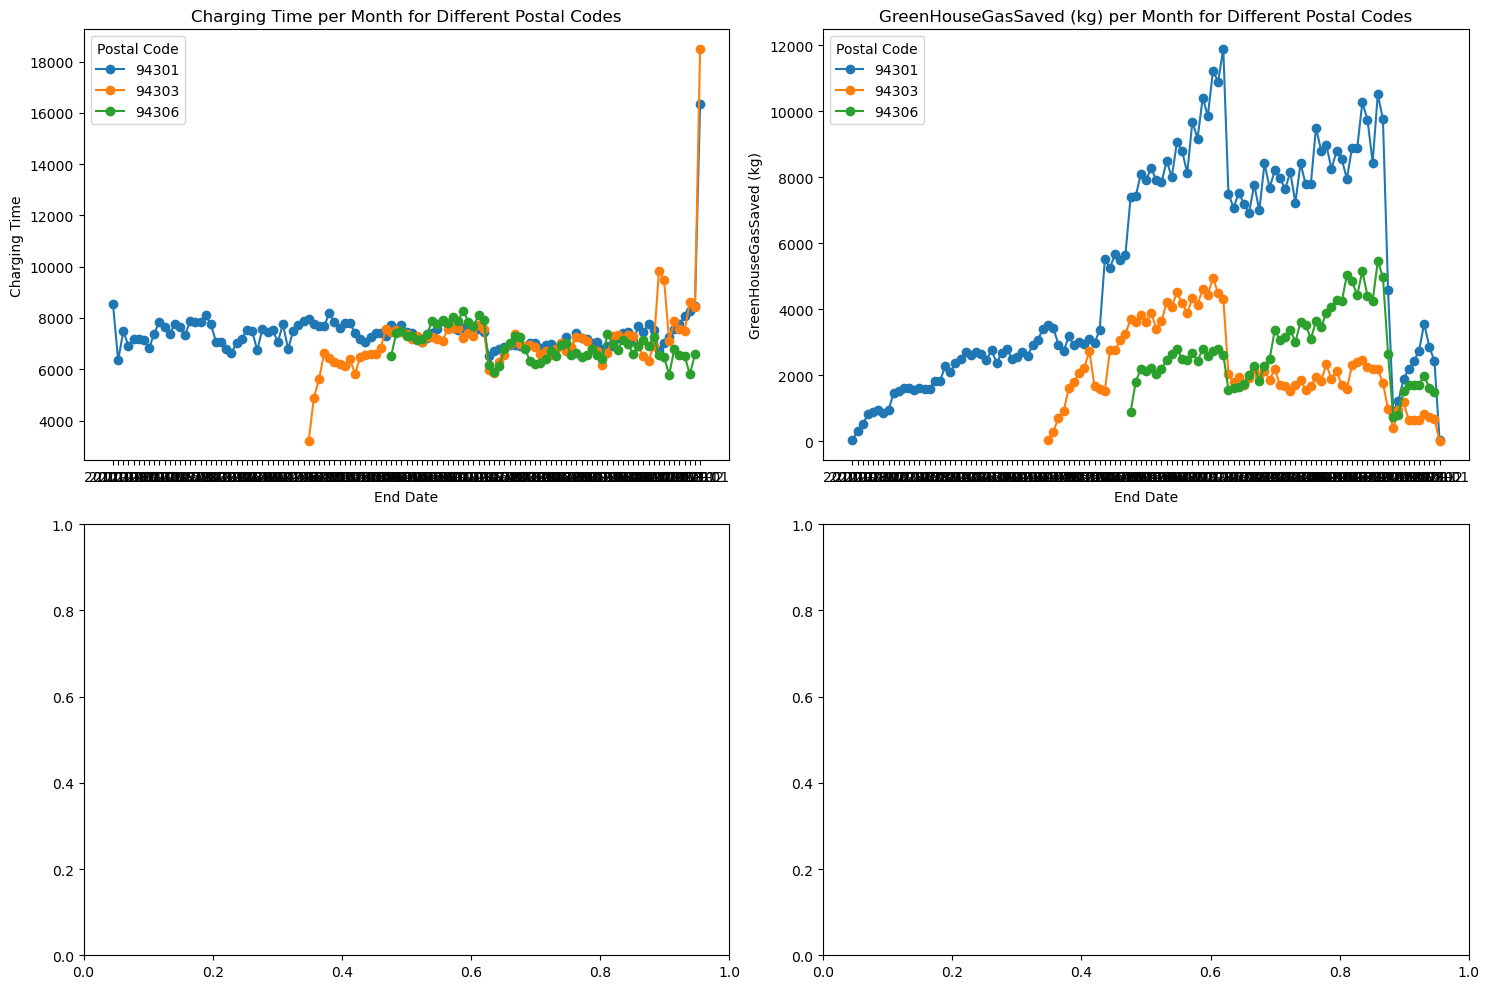

In [86]:
monthly_total_by_postal.reset_index(inplace=True)

# Convert 'End Date' to string
monthly_total_by_postal['End Date'] = monthly_total_by_postal['End Date'].astype(str)

# Plotting line graph for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

metrics = ['Charging Time', 'GreenHouseGasSaved (kg)']

for metric, ax in zip(metrics, axes.flatten()):
    # Plotting each Postal Code as a separate line
    for postal_code, data in monthly_total_by_postal.groupby('Postal Code'):
        ax.plot(data['End Date'], data[metric], label=postal_code, marker='o')

    # Adding labels and title
    ax.set_xlabel('End Date')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} per Month for Different Postal Codes')
    ax.legend(title='Postal Code')


plt.tight_layout()
plt.show()


In [89]:
df.to_csv('df1.csv',index=False)

In [90]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

As previously mentioned we are now focusing on year 2017 as previous years have no revenue and have too much free charging fees. To build a model to predict wait time we are using 2017 dataset.

In [91]:
#Filter rows for the year 2017
df_2017 = df[df['Start Date'].dt.year == 2017]
df_2018 = df[df['Start Date'].dt.year == 2018]


In [92]:
df_2017.to_csv('df2017.csv', index=False)

In [93]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49022 entries, 99761 to 148782
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Station Name               49022 non-null  object        
 1   MAC Address                49022 non-null  object        
 2   Org Name                   49022 non-null  object        
 3   Start Date                 49022 non-null  datetime64[ns]
 4   Start Time Zone            49022 non-null  object        
 5   End Date                   49022 non-null  object        
 6   End Time Zone              49022 non-null  object        
 7   Transaction Date           48973 non-null  object        
 8   Total Duration             49022 non-null  float64       
 9   Charging Time              49022 non-null  float64       
 10  Energy                     49022 non-null  float64       
 11  GreenHouseGasSave          49022 non-null  float64       
 12  Gaso

In [94]:
df_2017['Wait Time'] = df_2017['Total Duration'] - df_2017['Charging Time']

/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_78368/2059181462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Wait Time'] = df_2017['Total Duration'] - df_2017['Charging Time']


In [95]:
df_2017.head()

Station Name          MAC Address            Org Name  \
99761     WEBSTER #1  0024:B100:0002:1146  City of Palo Alto    
99762     WEBSTER #3  0024:B100:0002:13D1  City of Palo Alto    
99763   CAMBRIDGE #2  0024:B100:0002:13B7  City of Palo Alto    
99764         MPL #5  000D:6F00:0154:FFC5  City of Palo Alto    
99765        HIGH #1  0024:B100:0002:10FE  City of Palo Alto    

               Start Date Start Time Zone        End Date End Time Zone  \
99761 2017-01-01 07:24:00             PST   1/1/2017 8:39           PST   
99762 2017-01-01 07:27:00             PST   1/1/2017 8:43           PST   
99763 2017-01-01 07:47:00             PST   1/1/2017 8:13           PST   
99764 2017-01-01 08:04:00             PST   1/1/2017 9:06           PST   
99765 2017-01-01 08:16:00             PST  1/1/2017 14:23           PST   

      Transaction Date  Total Duration  Charging Time  ...  \
99761    1/1/2017 8:39          4496.0         4471.0  ...   
99762    1/1/2017 8:43          4550.0         3989.0  ...   
99763    1/1/2017 8:13          1575.0         1376.0  ...   
99764    1/1/2017 9:06          3706.0         3680.0  ...   
99765   1/1/2017 14:23         22025.0        17538.0  ...   

                   County    System S/N   Model Number ByYear  \
99761  Santa Clara County  1.422410e+11   CT4020-HD-GW   2017   
99762  Santa Clara County  1.429410e+11   CT4020-HD-GW   2017   
99763  Santa Clara County  1.428410e+11   CT4020-HD-GW   2017   
99764    San Mateo County  1.140100e+11  CT2000-HD-CCR   2017   
99765  Santa Clara County  1.422410e+11   CT4020-HD-GW   2017   

       TimeAfterCharged Total_Amount_For_Charging  byWeek weekend weekday  \
99761          0.416667                       0.0  Sunday    True   False   
99762          9.350000                       0.0  Sunday    True   False   
99763          3.316667                       0.0  Sunday    True   False   
99764          0.433333                       0.0  Sunday    True   False   
99765         74.783333                       0.0  Sunday    True   False   

      Wait Time  
99761      25.0  
99762     561.0  
99763     199.0  
99764      26.0  
99765    4487.0  

[5 rows x 40 columns]

In [96]:
from sklearn.linear_model import LinearRegression

Use linear regression model to find features and target variable.

In [97]:
df.fillna(0, inplace=True)  # Replace missing values with 0 for numeric columns


In [98]:
df_2017['Ave Duration'] = df_2017.groupby('Station Name')['Total Duration'].transform('mean')
df_2017['Ave Duration']

/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_78368/1617709308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Ave Duration'] = df_2017.groupby('Station Name')['Total Duration'].transform('mean')


99761     10385.432500
99762     10125.189238
99763      8809.856839
99764      9074.260490
99765      8745.009783
              ...     
148778     8809.856839
148779     8264.018539
148780     8191.441379
148781    10329.304441
148782    10636.375000
Name: Ave Duration, Length: 49022, dtype: float64

In [99]:
avgTimeBy_St = df_2017.groupby(['Station Name', 'Address 1','byWeek'])['Charging Time'].mean() / 60
avgTimeBy_St.sort_values(ascending=False)
#changing it to minute 
#average charging time by station


Station Name      Address 1            byWeek   
 WEBSTER #2       532 Webster St       Saturday     155.912990
 WEBSTER #3       520 Cowper St        Friday       154.766667
 MPL #2           3700 Middlefield Rd  Sunday       149.437319
 TED THOMPSON #1  275 Cambridge Ave    Monday       146.106983
 WEBSTER #3       533 Cowper St        Wednesday    144.625000
                                                       ...    
 HAMILTON #1      250 Hamilton Ave     Saturday      91.597619
 CAMBRIDGE #1     400 Cambridge Ave    Sunday        88.384830
 BRYANT #5        445 Bryant St        Saturday      86.400403
 CAMBRIDGE #2     400 Cambridge Ave    Sunday        76.026309
 HIGH #3          528 high st          Friday        62.150000
Name: Charging Time, Length: 223, dtype: float64

/Users/stevekim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stevekim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


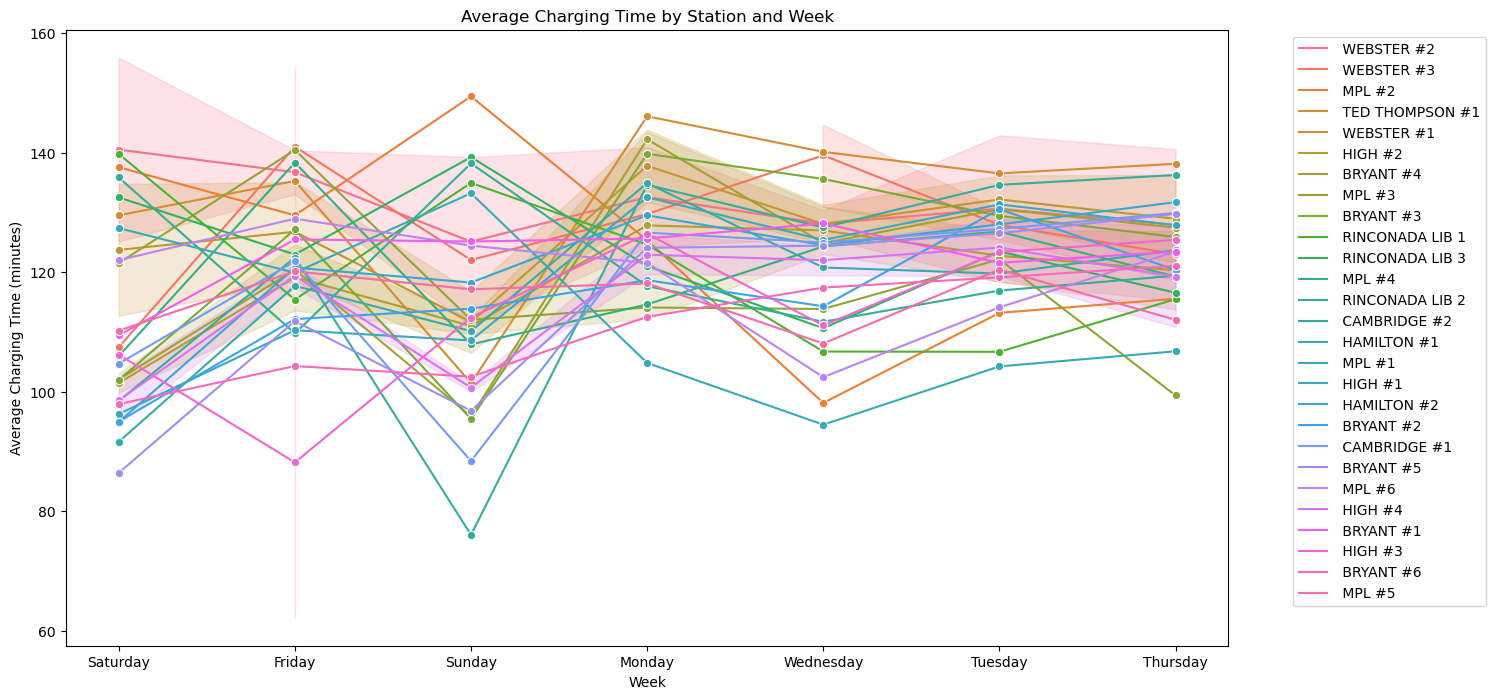

In [100]:
# Sort values in descending order
avg_time_by_station = avgTimeBy_St.sort_values(ascending=False)

# Reset index to make 'Station Name', 'Address 1', and 'byWeek' as regular columns
avg_time_by_station = avg_time_by_station.reset_index()

# Plot the average charging time by station as a line graph
plt.figure(figsize=(15, 8))
sns.lineplot(x='byWeek', y='Charging Time', hue='Station Name', data=avg_time_by_station, marker='o')
plt.title('Average Charging Time by Station and Week')
plt.xlabel('Week')
plt.ylabel('Average Charging Time (minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

In [155]:
avgTimeBy_St = df_2017.groupby(['Station Name', 'Address 1','byWeek'])['Wait Time'].mean()
avgTimeBy_St.sort_values(ascending=False)
#changing it to minute 
#average charging time by station

Station Name  Address 1            byWeek  
 HIGH #3      528 high st          Friday      6422.000000
 MPL #3       3700 Middlefield Rd  Tuesday     5538.644444
 MPL #1       3700 Middlefield Rd  Thursday    5374.282609
 WEBSTER #2   532 Webster St       Sunday      5109.000000
 WEBSTER #1   532 Webster St       Monday      5005.322581
                                                  ...     
 BRYANT #6    445 Bryant St        Monday       795.189781
 HIGH #4      528 High St          Saturday     775.913580
 BRYANT #4    445 Bryant St        Sunday       750.080645
 HIGH #4      528 high st          Saturday     597.609023
                                   Sunday       569.216867
Name: Wait Time, Length: 223, dtype: float64

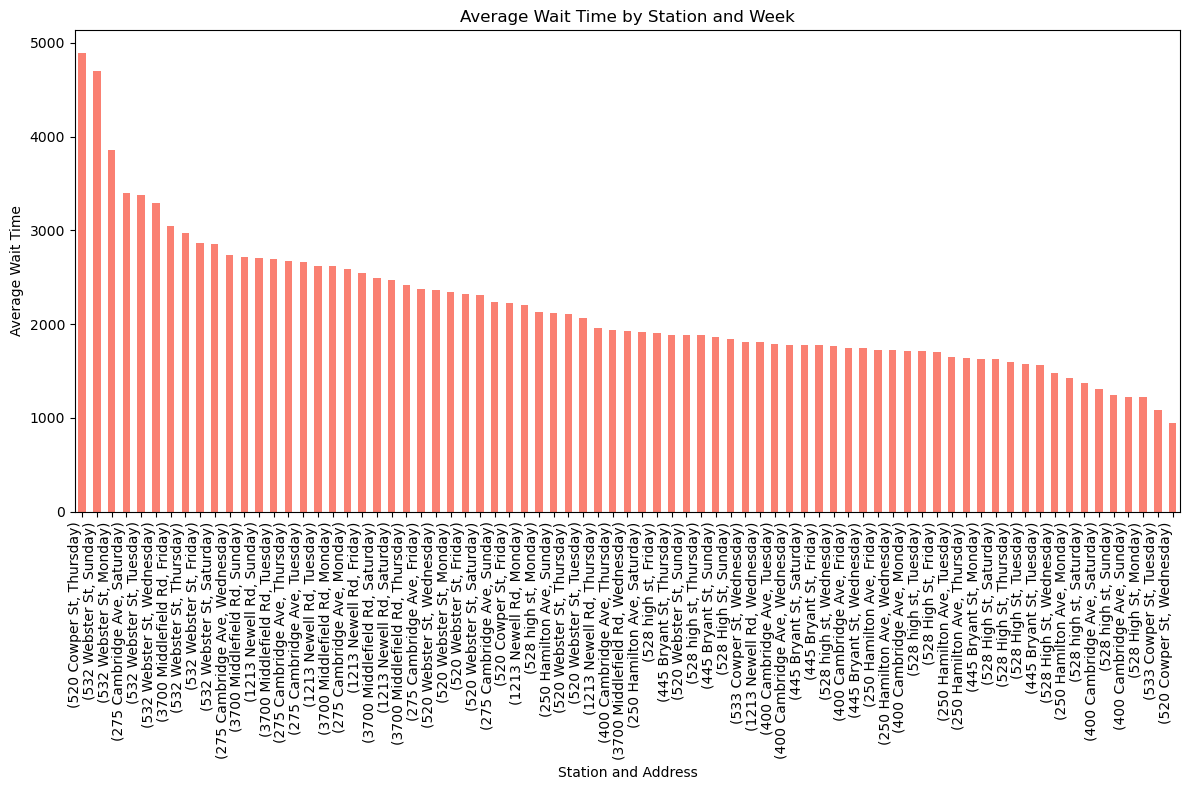

In [157]:
avg_wait_time_by_station = df_2017.groupby(['Address 1', 'byWeek'])['Wait Time'].mean()
avg_wait_time_by_station = avg_wait_time_by_station.sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12, 8))
avg_wait_time_by_station.plot(kind='bar', color='salmon')
plt.title('Average Wait Time by Station and Week')
plt.xlabel('Station and Address')
plt.ylabel('Average Wait Time')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

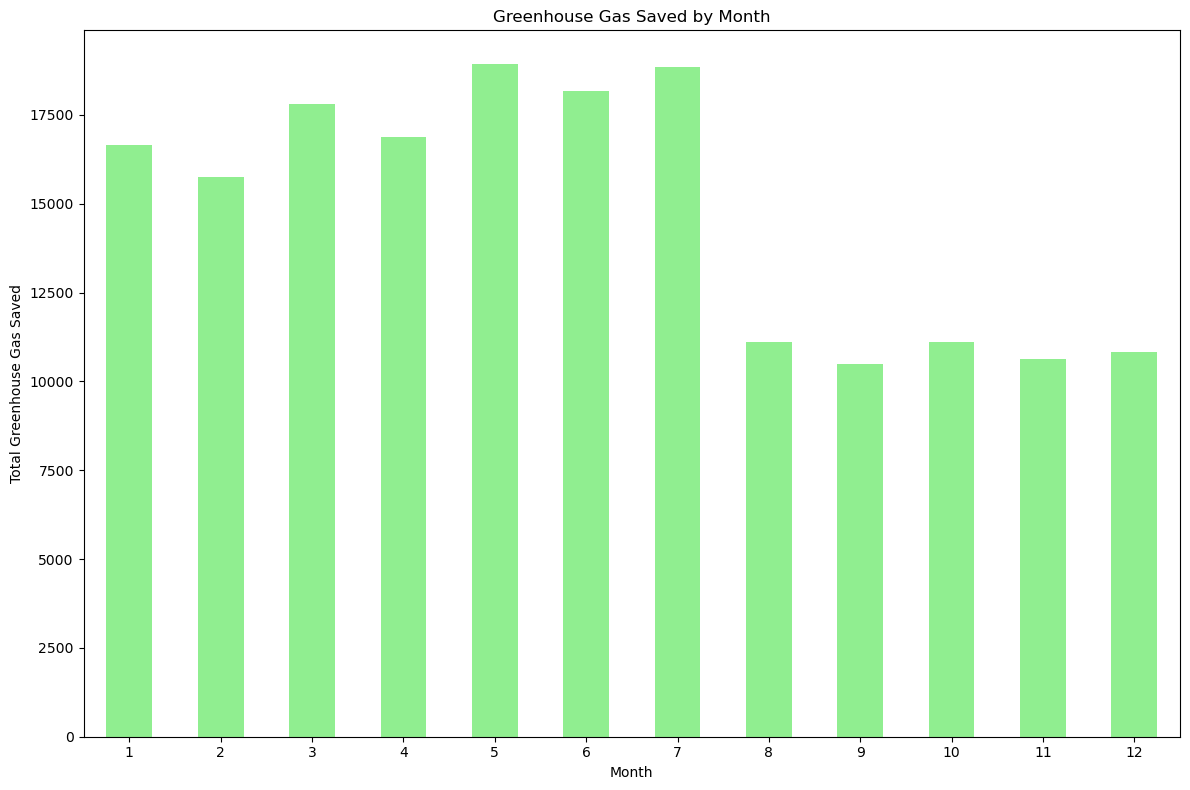

In [161]:
avg_ghg_saved_by_month = df_2017.groupby(['Month'])['GreenHouseGasSave'].sum()

# Bar plot
plt.figure(figsize=(12, 8))
avg_ghg_saved_by_month.plot(kind='bar', color='lightgreen')
plt.title('Greenhouse Gas Saved by Month')
plt.xlabel('Month')
plt.ylabel('Total Greenhouse Gas Saved')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

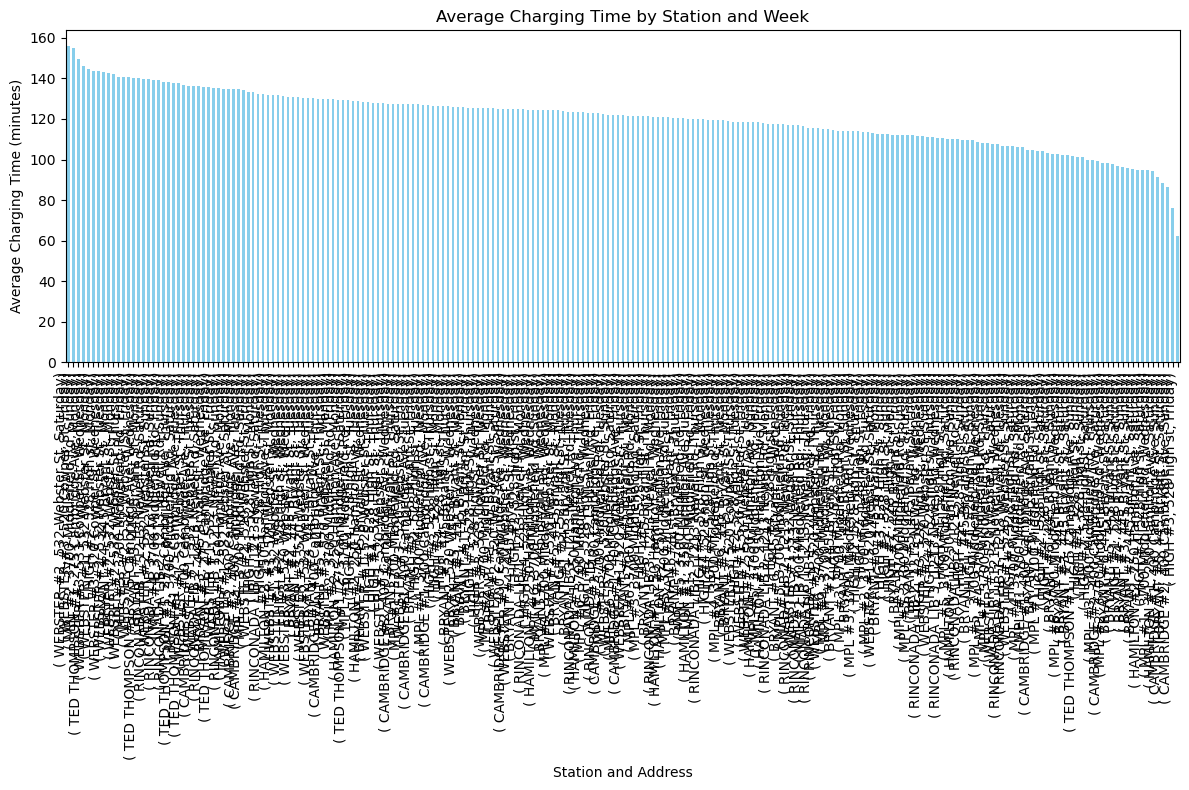

In [154]:
# Assuming you have a DataFrame with 'Station Name', 'Address 1', 'byWeek', and 'Charging Time' columns
avg_time_by_station = df_2017.groupby(['Station Name', 'Address 1', 'byWeek'])['Charging Time'].mean() / 60
avg_time_by_station = avg_time_by_station.sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12, 8))
avg_time_by_station.plot(kind='bar', color='skyblue')
plt.title('Average Charging Time by Station and Week')
plt.xlabel('Station and Address')
plt.ylabel('Average Charging Time (minutes)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [102]:

df_2017.fillna(0)



Station Name          MAC Address            Org Name  \
99761      WEBSTER #1  0024:B100:0002:1146  City of Palo Alto    
99762      WEBSTER #3  0024:B100:0002:13D1  City of Palo Alto    
99763    CAMBRIDGE #2  0024:B100:0002:13B7  City of Palo Alto    
99764          MPL #5  000D:6F00:0154:FFC5  City of Palo Alto    
99765         HIGH #1  0024:B100:0002:10FE  City of Palo Alto    
...               ...                  ...                 ...   
148778   CAMBRIDGE #2  0024:B100:0002:13B7  City of Palo Alto    
148779      BRYANT #5  0024:B100:0002:6D51  City of Palo Alto    
148780        HIGH #4  0024:B100:0002:1327  City of Palo Alto    
148781     WEBSTER #2  0024:B100:0002:050E  City of Palo Alto    
148782         MPL #2  000D:6F00:0154:EF9A  City of Palo Alto    

                Start Date Start Time Zone          End Date End Time Zone  \
99761  2017-01-01 07:24:00             PST     1/1/2017 8:39           PST   
99762  2017-01-01 07:27:00             PST     1/1/2017 8:43           PST   
99763  2017-01-01 07:47:00             PST     1/1/2017 8:13           PST   
99764  2017-01-01 08:04:00             PST     1/1/2017 9:06           PST   
99765  2017-01-01 08:16:00             PST    1/1/2017 14:23           PST   
...                    ...             ...               ...           ...   
148778 2017-12-31 19:58:00             PST  12/31/2017 20:19           PST   
148779 2017-12-31 20:20:00             PST  12/31/2017 22:57           PST   
148780 2017-12-31 20:54:00             PST  12/31/2017 22:04           PST   
148781 2017-12-31 21:00:00             PST  12/31/2017 22:56           PST   
148782 2017-12-31 23:35:00             PST     1/1/2018 7:18           PST   

        Transaction Date  Total Duration  Charging Time  ...    System S/N  \
99761      1/1/2017 8:39          4496.0         4471.0  ...  1.422410e+11   
99762      1/1/2017 8:43          4550.0         3989.0  ...  1.429410e+11   
99763      1/1/2017 8:13          1575.0         1376.0  ...  1.428410e+11   
99764      1/1/2017 9:06          3706.0         3680.0  ...  1.140100e+11   
99765     1/1/2017 14:23         22025.0        17538.0  ...  1.422410e+11   
...                  ...             ...            ...  ...           ...   
148778  12/31/2017 20:20          1251.0         1234.0  ...  1.428410e+11   
148779  12/31/2017 22:58          9422.0         9410.0  ...  1.707410e+11   
148780  12/31/2017 22:06          4178.0         4161.0  ...  1.427410e+11   
148781  12/31/2017 22:56          6917.0         4182.0  ...  1.344410e+11   
148782     1/1/2018 7:18         27746.0        27733.0  ...  1.149100e+11   

         Model Number  ByYear TimeAfterCharged  Total_Amount_For_Charging  \
99761    CT4020-HD-GW    2017         0.416667                       0.00   
99762    CT4020-HD-GW    2017         9.350000                       0.00   
99763    CT4020-HD-GW    2017         3.316667                       0.00   
99764   CT2000-HD-CCR    2017         0.433333                       0.00   
99765    CT4020-HD-GW    2017        74.783333                       0.00   
...               ...     ...              ...                        ...   
148778   CT4020-HD-GW    2017         0.283333                     579.98   
148779      CT4020-HD    2017         0.200000                   33970.10   
148780   CT4020-HD-GW    2017         0.283333                    3703.29   
148781      CT4020-HD    2017        45.583333                    5562.06   
148782  CT2000-HD-CCR    2017         0.216667                  302289.70   

        byWeek  weekend weekday Wait Time  Ave Duration  
99761   Sunday     True   False      25.0  10385.432500  
99762   Sunday     True   False     561.0  10125.189238  
99763   Sunday     True   False     199.0   8809.856839  
99764   Sunday     True   False      26.0   9074.260490  
99765   Sunday     True   False    4487.0   8745.009783  
...        ...      ...     ...       ...           ...  
148778  Sun

In [103]:
# Remove non-numeric characters from 'User ID' column
df_2017['User ID'] = df_2017['User ID'].astype(str).str.replace(r'\D', '', regex=True)

# Convert 'User ID' column to numeric
df_2017['User ID'] = pd.to_numeric(df_2017['User ID'], errors='coerce')

# Fill NaN values with 0
df_2017['User ID'].fillna(0, inplace=True)

# Convert 'User ID' column to integer
df_2017['User ID'] = df_2017['User ID'].astype(int)




/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_78368/2279122571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['User ID'] = df_2017['User ID'].astype(str).str.replace(r'\D', '', regex=True)
/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_78368/2279122571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['User ID'] = pd.to_numeric(df_2017['User ID'], errors='coerce')
/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_78368/2279122571.py:8: SettingWithCopy

In [104]:
df_2017['Port Type']

99761     Level 2
99762     Level 2
99763     Level 2
99764     Level 2
99765     Level 2
           ...   
148778    Level 2
148779    Level 2
148780    Level 2
148781    Level 2
148782    Level 2
Name: Port Type, Length: 49022, dtype: object

we are now only focusing on level 2 as level 1 charging stations offered free fees.

In [105]:
df_2017['Port Type'] = df_2017['Port Type'].map({'Level 1': 0, 'Level 2': 1})


/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_78368/3197116926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Port Type'] = df_2017['Port Type'].map({'Level 1': 0, 'Level 2': 1})


In [106]:
df_2017['Port Type'] = df_2017['Port Type'].fillna(0).astype(int).inplace=True

/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_78368/1304954948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Port Type'] = df_2017['Port Type'].fillna(0).astype(int).inplace=True


In [107]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_2017 = df_2017.copy()

# Convert 'End Date' to datetime
df_2017['End Date'] = pd.to_datetime(df_2017['End Date'], format='%m/%d/%Y %H:%M', errors='coerce')

# Drop rows with NaT values
df_2017 = df_2017.dropna(subset=['End Date'])

# Extract the month
df_2017['Month'] = df_2017['End Date'].dt.month
df_2017["Week"] = df_2017["End Date"].dt.isocalendar().week

In [109]:
df_2017['User ID'].isna().sum()

0

In [110]:
df_2017['weekend'] = df_2017['weekend'].astype(int)
df_2017['Port Type'] = df_2017['Port Type'].astype(int)

In [111]:
df_2017['Total Duration']
# in minutes

99761      4496.0
99762      4550.0
99763      1575.0
99764      3706.0
99765     22025.0
           ...   
148778     1251.0
148779     9422.0
148780     4178.0
148781     6917.0
148782    27746.0
Name: Total Duration, Length: 48982, dtype: float64

In [112]:
X = df_2017[['TimeAfterCharged','Fee','weekend','Month','Energy','Port Type','Port Number']]
y = df_2017['Total Duration']
# if total duration_min greater than certain average minute then this location is busy

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.25)

In [113]:
# Validate and evaluate
linear = LinearRegression() # change name to Linear
linear.fit(X_train, y_train)

# score the model accuracy scores and store in variables for display later
acc_train_baseline = linear.score(X_train, y_train)
acc_test_baseline = linear.score(X_test, y_test)

# scores
print(f"R^2: {acc_train_baseline}")
print(f"Adjusted R^2: {acc_test_baseline}")

Total Duration train accuracy: 0.9257224125944159
Total Duration test accuracy: 0.9263106528318188


In [114]:
linear.coef_

array([  64.00412717,  -17.6487215 , -588.95093897,  -37.85232797,
        611.79202749,    0.        ,   44.43092093])

In [115]:
y_train = y_train.astype(float)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:         Total Duration   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 7.629e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:31:46   Log-Likelihood:            -3.3547e+05
No. Observations:               36736   AIC:                         6.710e+05
Df Residuals:                   36729   BIC:                         6.710e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
TimeAfterCharged    64.0041      0.126  

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
# Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()

# Fit the model on scaled training data
linear_model.fit(X_train_ss, y_train)

# Now you can use the model for predictions
y_pred_train = linear_model.predict(X_train_ss)
y_pred_test = linear_model.predict(X_test_ss)

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate on training set
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluate on test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train}, MAE: {mae_train}, R-squared: {r2_train}")
print(f"Test MSE: {mse_test}, MAE: {mae_test}, R-squared: {r2_test}")


Training MSE: 5006031.179848158, MAE: 1767.2914019653174, R-squared: 0.9257224125944159
Test MSE: 4770423.44974267, MAE: 1762.7638782910792, R-squared: 0.9263106528318188


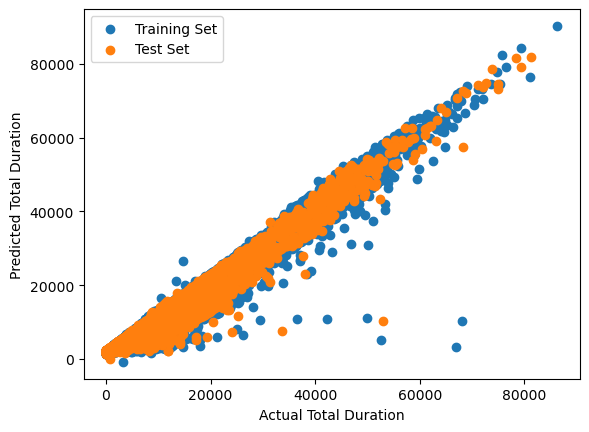

In [119]:

plt.scatter(y_train, y_pred_train, label='Training Set')
plt.scatter(y_test, y_pred_test, label='Test Set')
plt.xlabel('Actual Total Duration')
plt.ylabel('Predicted Total Duration')
plt.legend()
plt.show()


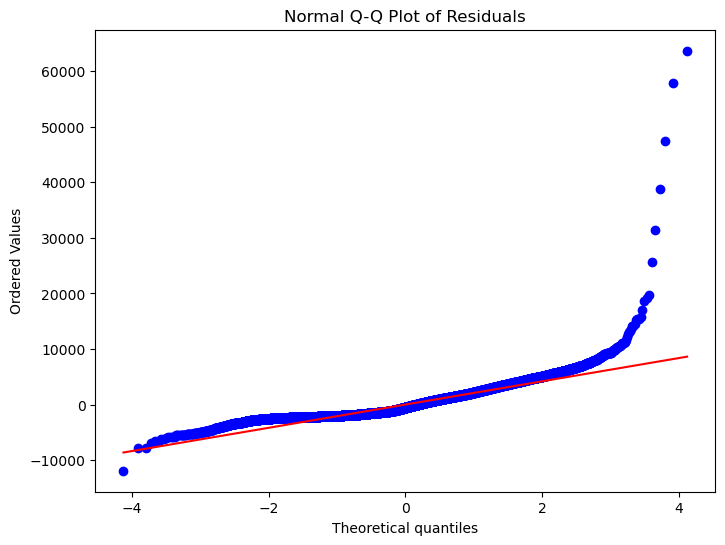

In [120]:
residuals = y_train - y_pred_train  

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)

plt.title("Normal Q-Q Plot of Residuals")
plt.show()

Few outliers may indicate customers who charge overnight or forgot to unplugged charing port after finished.



/Users/stevekim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stevekim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stevekim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stevekim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

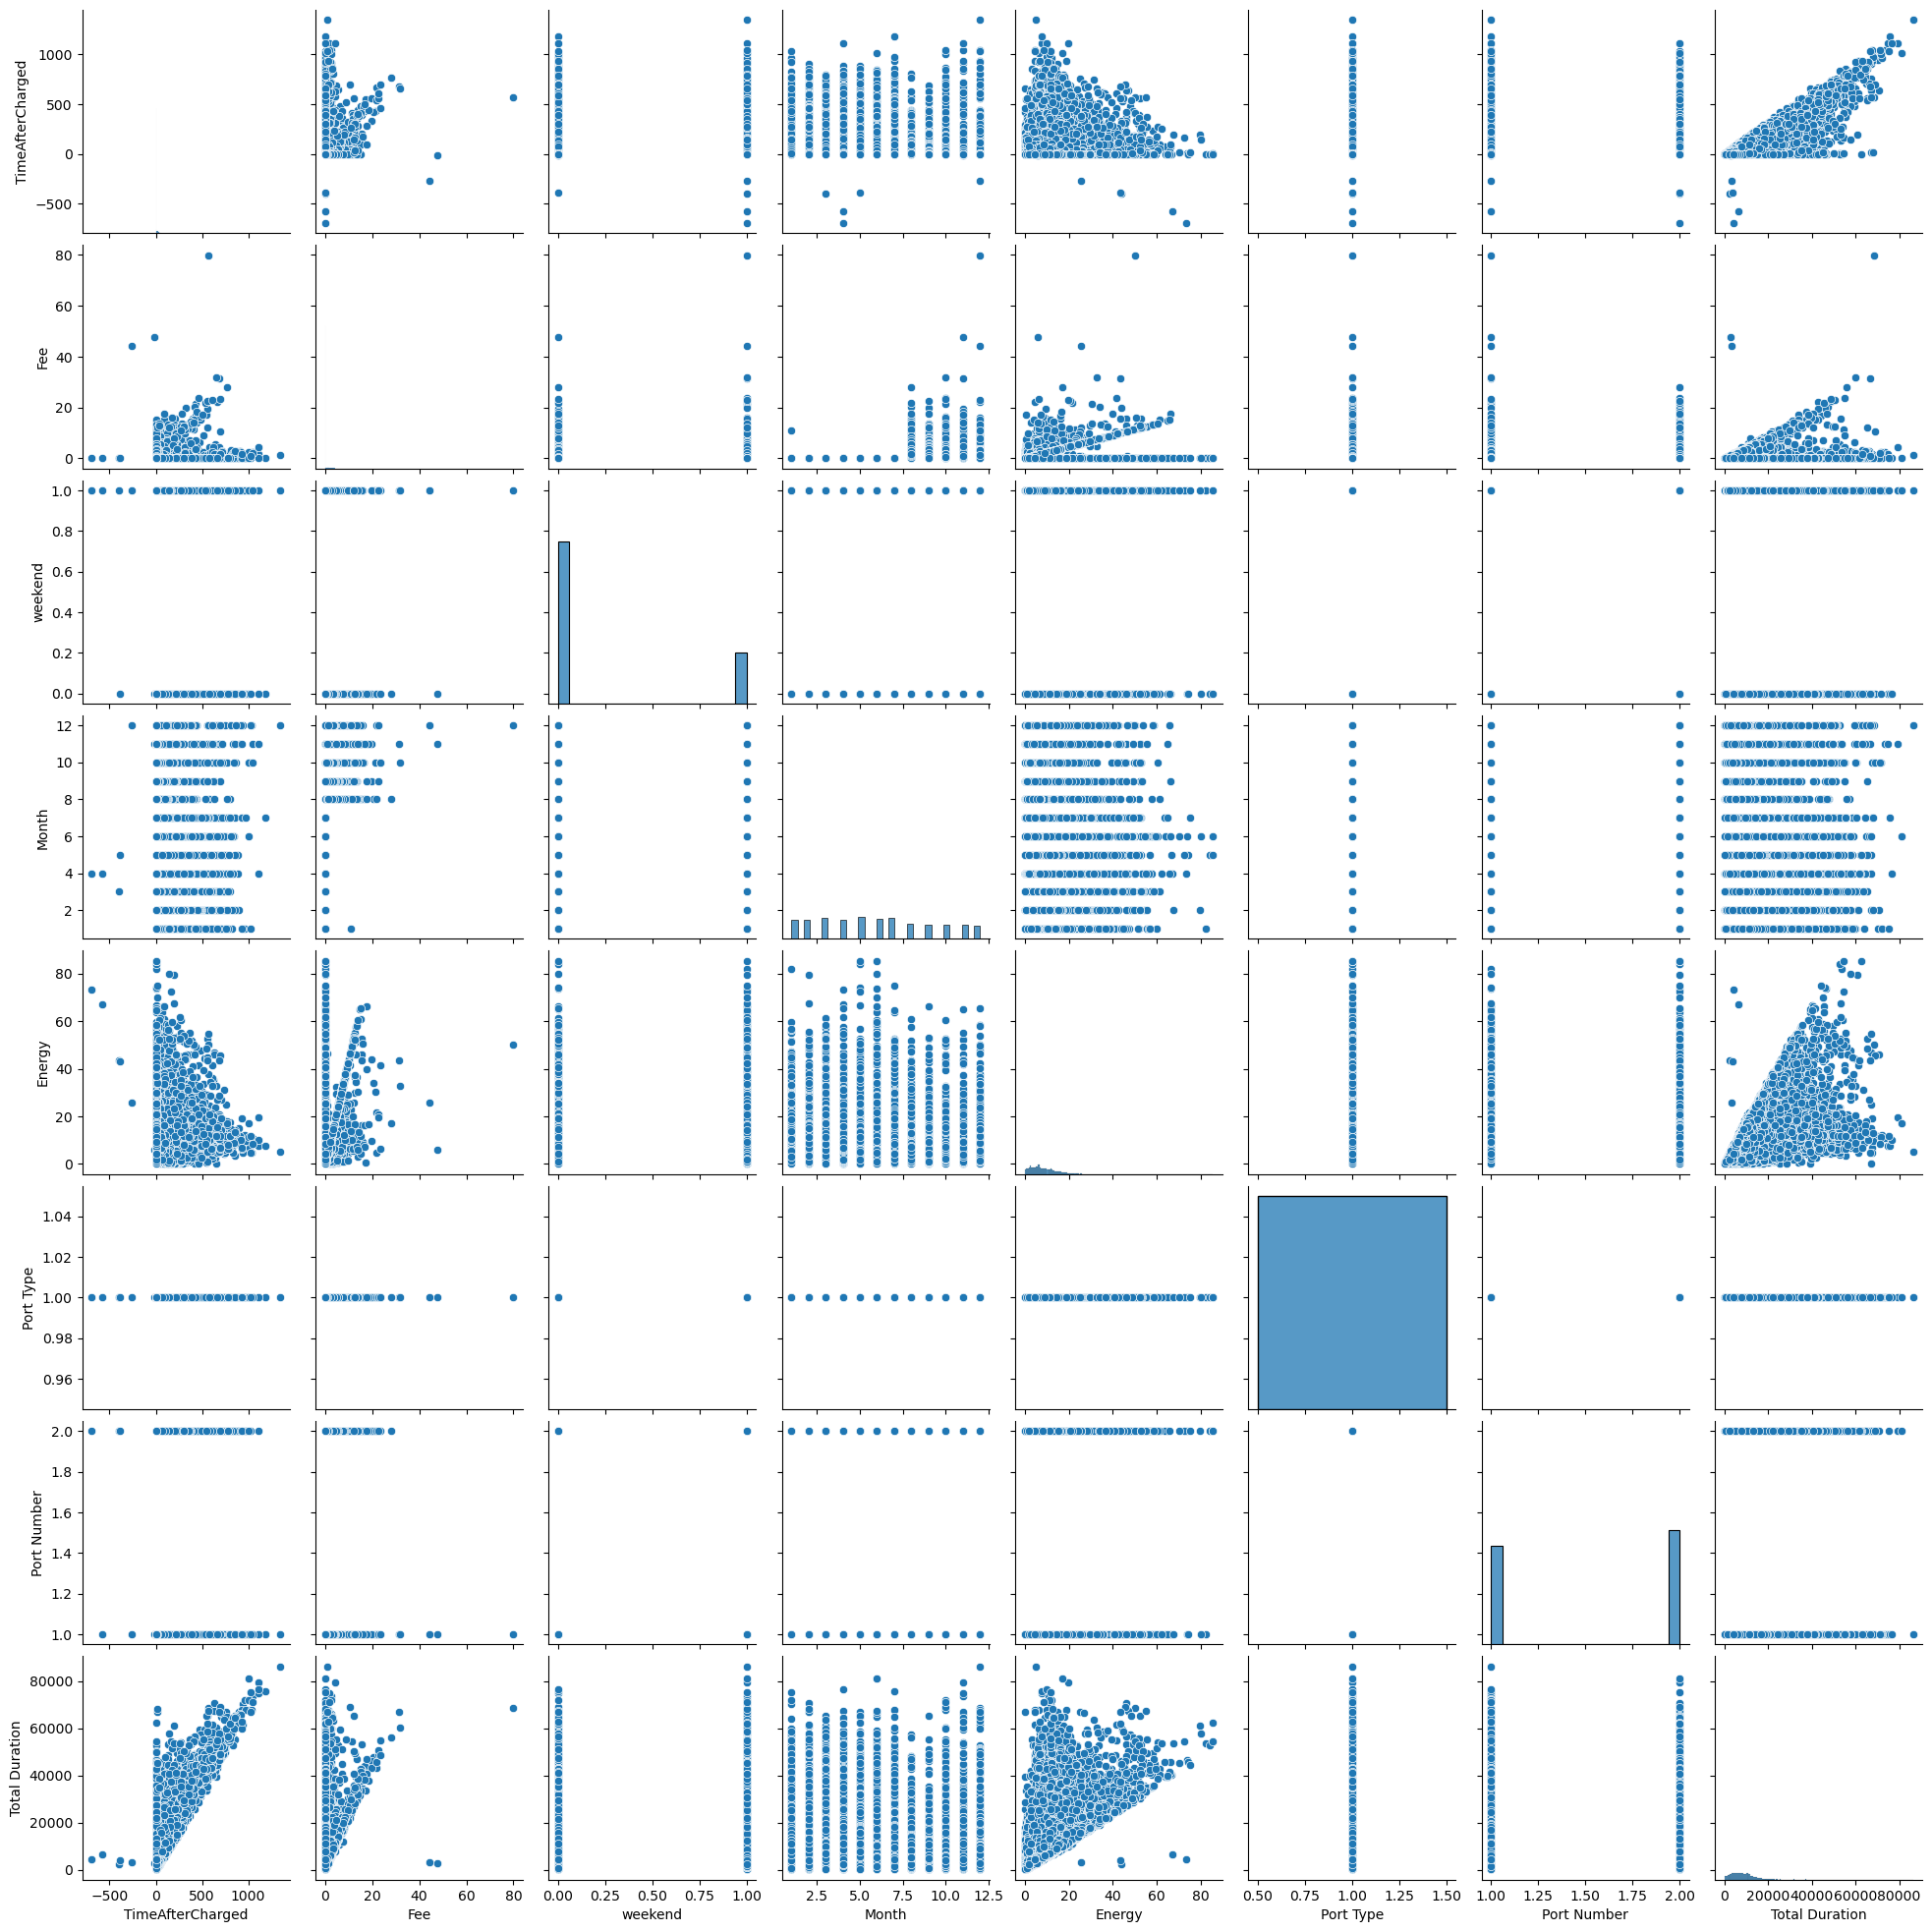

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate predictor variables and response variable
data_for_linearity = pd.concat([X_train, y_train], axis=1)

# Create a pairplot
sns.pairplot(data_for_linearity)
plt.show()



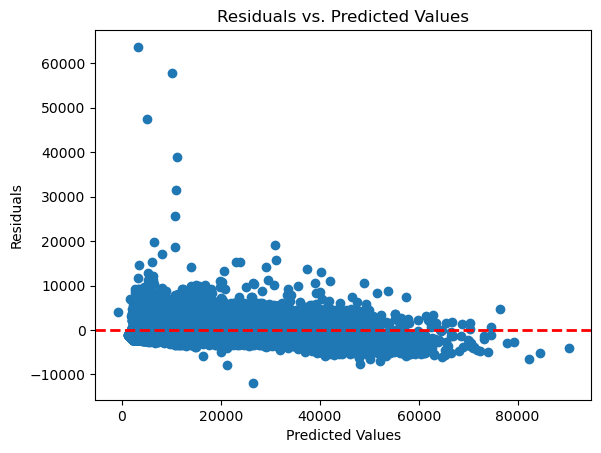

In [122]:
residuals = y_train - y_pred_train  

plt.scatter(y_pred_train, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [123]:

X_train['TimeAfterCharged_Energy'] = X_train['TimeAfterCharged'] * X_train['Energy']
X_test['TimeAfterCharged_Energy'] = X_test['TimeAfterCharged'] * X_test['Energy']


In [124]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [125]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)
lasso_train_score = lasso_model.score(X_train, y_train)
lasso_test_score = lasso_model.score(X_test, y_test)


In [126]:
from sklearn.linear_model import Ridge

# Example: Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
ridge_train_score = ridge_model.score(X_train, y_train)
ridge_test_score = ridge_model.score(X_test, y_test)


In [127]:
Scatter plot of TimeAfterCharged vs. Total Duration
plt.scatter(X_train['TimeAfterCharged'], y_train)
plt.xlabel('TimeAfterCharged')
plt.ylabel('Total Duration')
plt.title('Scatter Plot of TimeAfterCharged vs. Total Duration')
plt.show()


SyntaxError: invalid syntax (1070648621.py, line 1)

In [ ]:
Scatter plot of TimeAfterCharged_Energy vs. Total Duration
plt.scatter(X_train['TimeAfterCharged_Energy'], y_train)
plt.xlabel('TimeAfterCharged_Energy')
plt.ylabel('Total Duration')
plt.title('TimeAfterCharged_Energy vs. Total Duration')
plt.show()


In [ ]:
Scatter plot of Quadratic Feature vs. Total Duration
plt.scatter(X_train_poly[:, 1], y_train)  # Assuming the quadratic feature is at index 1
plt.xlabel('Quadratic Feature')
plt.ylabel('Total Duration')
plt.title('Scatter Plot of Quadratic Feature vs. Total Duration')
plt.show()


In [ ]:
lasso_residuals = y_train - lasso_model.predict(X_train)

# Scatter plot of residuals against predicted values
plt.scatter(lasso_model.predict(X_train), lasso_residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (Lasso)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Lasso)')
plt.show()


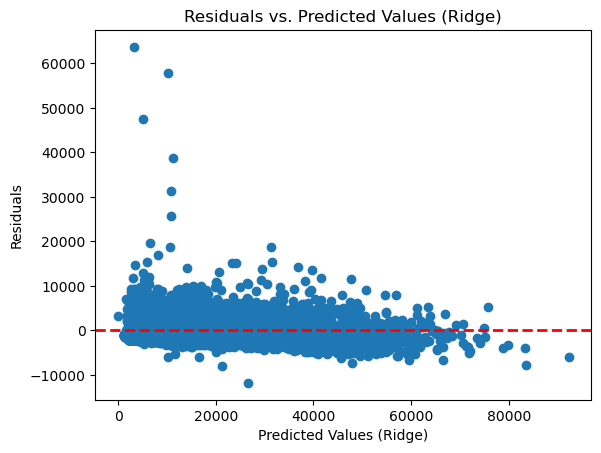

In [128]:
ridge_residuals = y_train - ridge_model.predict(X_train)

# Scatter plot of residuals against predicted values
plt.scatter(ridge_model.predict(X_train), ridge_residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values (Ridge)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Ridge)')
plt.show()


Ridged and Lasso regression models do not have significance in the dataset and model.

In [ ]:
df_2017.info()

In [130]:
df_2018 = df_2017.copy()

# Convert 'End Date' to datetime
df_2018['End Date'] = pd.to_datetime(df_2018['End Date'], format='%m/%d/%Y %H:%M', errors='coerce')

# Drop rows with NaT values
df_2018 = df_2018.dropna(subset=['End Date'])

# Extract the month
df_2018['Month'] = df_2018['End Date'].dt.month
df_2018["Week"] = df_2018["End Date"].dt.isocalendar().week

In [131]:
sample_row = df_2018.iloc[0]  

# Extract relevant features
new_data = pd.DataFrame({
    'TimeAfterCharged': [sample_row['TimeAfterCharged']],
    'Fee': [sample_row['Fee']],
    'weekend': [sample_row['weekend']],
    'Month': [sample_row['Month']],
    'Energy': [sample_row['Energy']],
    'Port Type': [sample_row['Port Type']],
    'Port Number': [sample_row['Port Number']]
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict total duration
predicted_total_duration = linear_model.predict(new_data_scaled)

# Convert predicted total duration to hours
predicted_total_duration_hours = predicted_total_duration[0] / 60
print(f"Predicted Total Duration (hours): {predicted_total_duration_hours}")




Predicted Total Duration (hours): 68.73621858351058


In [132]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Decision Tree RMSE (Train): 27.70797338277984
Decision Tree RMSE (Test): 2802.074903073191
Decision Tree MAE (Train): 0.3080901567944251
Decision Tree MAE (Test): 1825.3773885350317


KeyboardInterrupt: 

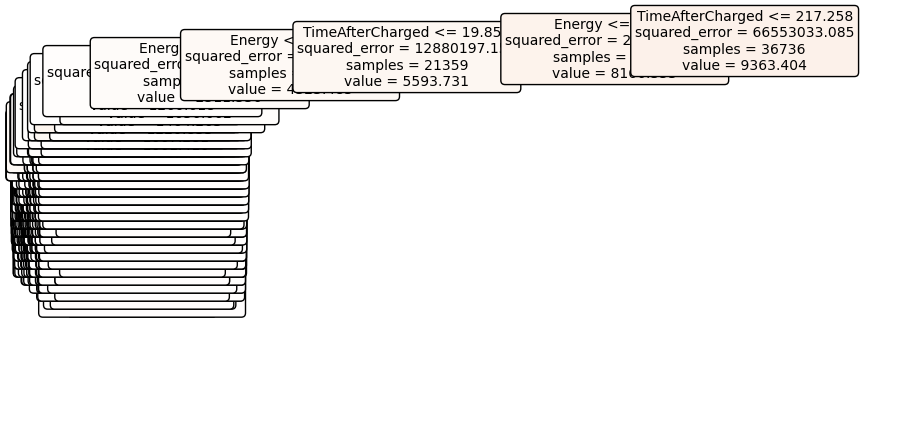

In [133]:
X = df_2017[['TimeAfterCharged', 'Fee', 'weekend', 'Month', 'Energy', 'Port Type', 'Port Number']]
y = df_2017['Total Duration']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

# Evaluate the model
rmse_train_dt = sqrt(mean_squared_error(y_train, y_pred_train_dt))
rmse_test_dt = sqrt(mean_squared_error(y_test, y_pred_test_dt))
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)

print(f"Decision Tree RMSE (Train): {rmse_train_dt}")
print(f"Decision Tree RMSE (Test): {rmse_test_dt}")
print(f"Decision Tree MAE (Train): {mae_train_dt}")
print(f"Decision Tree MAE (Test): {mae_test_dt}")

# Plot the Decision Tree
plt.figure(figsize=(10, 5))
plot_tree(decision_tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

df_2017['Transaction Date'] = pd.to_datetime(df_2017['Transaction Date'], errors='coerce', format='%m/%d/%Y %H:%M')

df_2017.dropna(subset=['Transaction Date'], inplace=True)


# Set the frequency of the index to 'D' for daily
df_2017.index.freq = 'D'


# Visualize the time series
plt.figure(figsize=(12, 6))
df_2017['Total Duration'].plot()
plt.title('Total Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Total Duration')
plt.show()

# Train-Test Split
train_size = int(len(df_2017) * 0.8)
train, test = df_2017[0:train_size], df_2017[train_size:]

# Plot ACF and PACF to determine the order of ARIMA(p,d,q) components
plot_acf(df_2017['Total Duration'], lags=30)
plt.show()

plot_pacf(df_2017['Total Duration'], lags=30)
plt.show()

# Determine order and seasonal_order based on ACF and PACF analysis
# Replace the following with appropriate values based on your analysis
p, d, q = 1, 1, 1  # Example values, replace with your findings
P, D, Q, S = 1, 1, 1, 12  # Example values, replace with your findings

# Build SARIMA Model
model = SARIMAX(train['Total Duration'], order=(p, d, q), seasonal_order=(P, D, Q, S))
result = model.fit(disp=False)

# Make predictions
predictions = result.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Evaluate the model
mse = mean_squared_error(test['Total Duration'], predicted_mean)
rmse = sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Total Duration'], label='Train')
plt.plot(test.index, test['Total Duration'], label='Test')
plt.plot(test.index, predicted_mean, label='Predictions', color='red')
plt.title('SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Total Duration')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Create a Ridge model
ridge_cv_model = Ridge(alpha=1.0)

# Use k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(ridge_cv_model, X_train_poly, y_train, cv=kf, scoring='r2')
print(f'Cross-Validation R-squared scores: {cv_scores}')


In [164]:
df_By_Month = df_2017[(df_2017['Start Date'].dt.year >= 2017) & (df_2017['Start Date'].dt.year <= 2020)]
df_Month = pd.to_datetime(df_By_Month['Transaction Date'], format='%m/%d/%Y %H:%M')
df_By_Month['Start Date'] = df_Month.dt.date


In [165]:
df_By_Month['Date'] = df_Month.dt.date
df_By_Month.set_index('Date', inplace=True)


In [147]:
df_By_Month

Station Name          MAC Address            Org Name  \
Date                                                                 
2017-01-01     WEBSTER #1  0024:B100:0002:1146  City of Palo Alto    
2017-01-01     WEBSTER #3  0024:B100:0002:13D1  City of Palo Alto    
2017-01-01   CAMBRIDGE #2  0024:B100:0002:13B7  City of Palo Alto    
2017-01-01         MPL #5  000D:6F00:0154:FFC5  City of Palo Alto    
2017-01-01        HIGH #1  0024:B100:0002:10FE  City of Palo Alto    
...                   ...                  ...                 ...   
2017-12-31   CAMBRIDGE #2  0024:B100:0002:13B7  City of Palo Alto    
2017-12-31      BRYANT #5  0024:B100:0002:6D51  City of Palo Alto    
2017-12-31        HIGH #4  0024:B100:0002:1327  City of Palo Alto    
2017-12-31     WEBSTER #2  0024:B100:0002:050E  City of Palo Alto    
2018-01-01         MPL #2  000D:6F00:0154:EF9A  City of Palo Alto    

            Start Date Start Time Zone            End Date End Time Zone  \
Date                                                                       
2017-01-01  2017-01-01             PST 2017-01-01 08:39:00           PST   
2017-01-01  2017-01-01             PST 2017-01-01 08:43:00           PST   
2017-01-01  2017-01-01             PST 2017-01-01 08:13:00           PST   
2017-01-01  2017-01-01             PST 2017-01-01 09:06:00           PST   
2017-01-01  2017-01-01             PST 2017-01-01 14:23:00           PST   
...                ...             ...                 ...           ...   
2017-12-31  2017-12-31             PST 2017-12-31 20:19:00           PST   
2017-12-31  2017-12-31             PST 2017-12-31 22:57:00           PST   
2017-12-31  2017-12-31             PST 2017-12-31 22:04:00           PST   
2017-12-31  2017-12-31             PST 2017-12-31 22:56:00           PST   
2018-01-01  2018-01-01             PST 2018-01-01 07:18:00           PST   

            Transaction Date  Total Duration  Charging Time  ...  ByYear  \
Date                                                         ...           
2017-01-01     1/1/2017 8:39          4496.0         4471.0  ...    2017   
2017-01-01     1/1/2017 8:43          4550.0         3989.0  ...    2017   
2017-01-01     1/1/2017 8:13          1575.0         1376.0  ...    2017   
2017-01-01     1/1/2017 9:06          3706.0         3680.0  ...    2017   
2017-01-01    1/1/2017 14:23         22025.0        17538.0  ...    2017   
...                      ...             ...            ...  ...     ...   
2017-12-31  12/31/2017 20:20          1251.0         1234.0  ...    2017   
2017-12-31  12/31/2017 22:58          9422.0         9410.0  ...    2017   
2017-12-31  12/31/2017 22:06          4178.0         4161.0  ...    2017   
2017-12-31  12/31/2017 22:56          6917.0         4182.0  ...    2017   
2018-01-01     1/1/2018 7:18         27746.0        27733.0  ...    2017   

            TimeAfterCharged  Total_Amount_For_Charging  byWeek  weekend  \
Date                                                                       
2017-01-01          0.416667                       0.00  Sunday        1   
2017-01-01          9.350000                       0.00  Sunday        1   
2017-01-01          3.316667                       0.00  Sunday        1   
2017-01-01          0.433333                       0.00  Sunday        1   
2017-01-01         74.783333                       0.00  Sunday        1   
...                      ...                        ...     ...      ...   
2017-12-31          0.283333                     579.98  Sunday        1   
2017-12-31          0.200000                   33970.10  Sunday        1   
2017-12-31          0.283333                    3703.29  Sunday        1   
2017-12-31         45.583333                    5562.06  Sunday        1   
2018-01-01          0.216667                  302289.70  Sunday        1   

           weekday  Wait Time  Ave Duration Month Week  
Date                                                    
2017-01-01   False   

In [185]:
df_date_mean = df_By_Month.groupby("Date")['Total Duration'].mean()

In [186]:
# Extract the specified columns
df2017_columns = df_date_mean

# Create a new DataFrame with the selected columns
df2 = pd.DataFrame(df2017_columns)

# Display the new DataFrame
df2
# This is average duration for each month

Total Duration
Date                      
2017-01-01     8470.030303
2017-01-02    10093.765766
2017-01-03    10001.776119
2017-01-04    11074.641221
2017-01-05     9771.063291
...                    ...
2017-12-28     9145.000000
2017-12-29     7741.500000
2017-12-30     7816.456140
2017-12-31    11203.632653
2018-01-01    20939.500000

[366 rows x 1 columns]

Text(0.5, 1.0, 'Average Charing Duration In Year 2017')

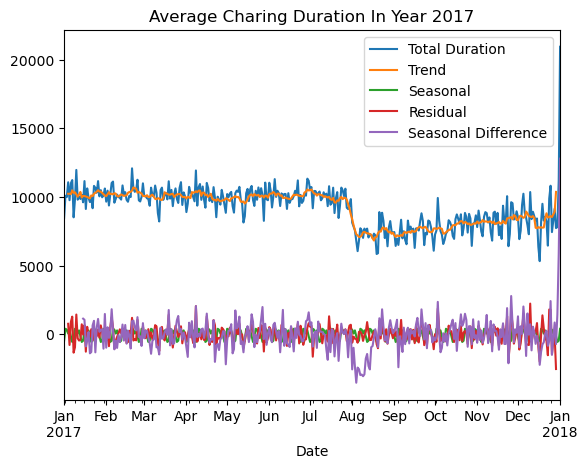

In [235]:
df2.plot()
plt.title('Average Charing Duration In Year 2017')

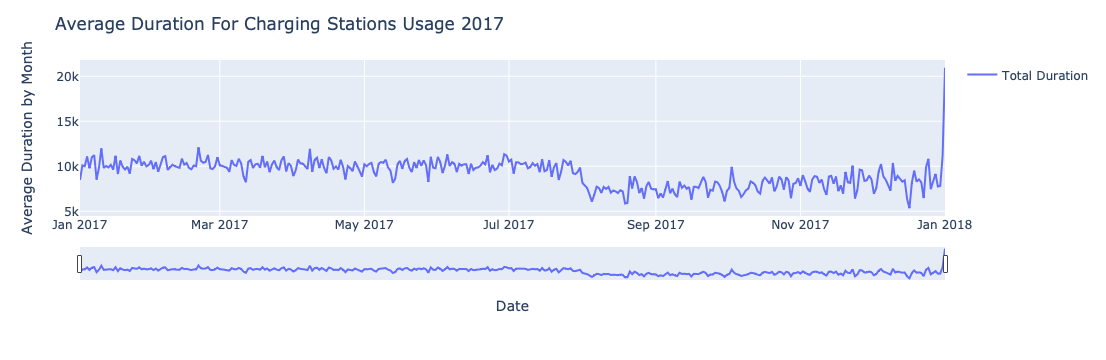

In [188]:
# add lines for each column
fig = px.line(df2, x=df2.index, y=df2.columns,)

# axis labels and title
fig.update_layout(
    yaxis_title="Average Duration by Month", 
    legend_title="", 
    title="Average Duration For Charging Stations Usage 2017"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [189]:
df2.shape

(366, 1)

In [190]:
first_day = df2.index.min()
last_day = df2.index.max()

# pandas `Timestamp` objects
first_day, last_day

(datetime.date(2017, 1, 1), datetime.date(2018, 1, 1))

In [191]:
first_day.year, first_day.month, first_day.day

(2017, 1, 1)

In [192]:
last_day - first_day

datetime.timedelta(days=365)

In [193]:
first_day + pd.DateOffset(years=1, months=3)

Timestamp('2018-04-01 00:00:00')

Missing Values and Dates

In [194]:
full_range = pd.date_range(start=first_day, end=last_day, freq="D")

full_range.difference(df2.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [195]:
df2.isna().sum()

Total Duration    0
dtype: int64

In [226]:
# monthly average
monthly_mean = df2.groupby(df2.index.Total Duration()).mean()

# relative deviation from the overall mean
monthly_mean_diff = (monthly_mean - monthly_mean.mean())/monthly_mean

# month names in right order
month_names = pd.date_range(start='2021-01', freq='M', periods=12).month_name()

# reorder columns to follow the month order
monthly_mean_diff = monthly_mean_diff.loc[month_names, ]

monthly_mean_diff.T

SyntaxError: invalid syntax. Perhaps you forgot a comma? (915289672.py, line 2)

In [227]:
fig = px.bar(monthly_mean_diff)

fig.update_layout(
    yaxis_title="", 
    yaxis_tickformat = '%',
    xaxis_title="",
    title="Monthly deviation from mean",
    showlegend=False,
)
fig.show()

NameError: name 'monthly_mean_diff' is not defined

In [228]:
# decompose the time series
decomposition = tsa.seasonal_decompose(df2, model='additive', period=7)

ValueError: This function does not handle missing values

In [201]:
type(decomposition)

statsmodels.tsa.seasonal.DecomposeResult

In [204]:
# add the decomposition data

df2['Trend'] = decomposition.trend
df2['Seasonal'] = decomposition.seasonal
df2['Residual'] = decomposition.resid

#df2.head(10)

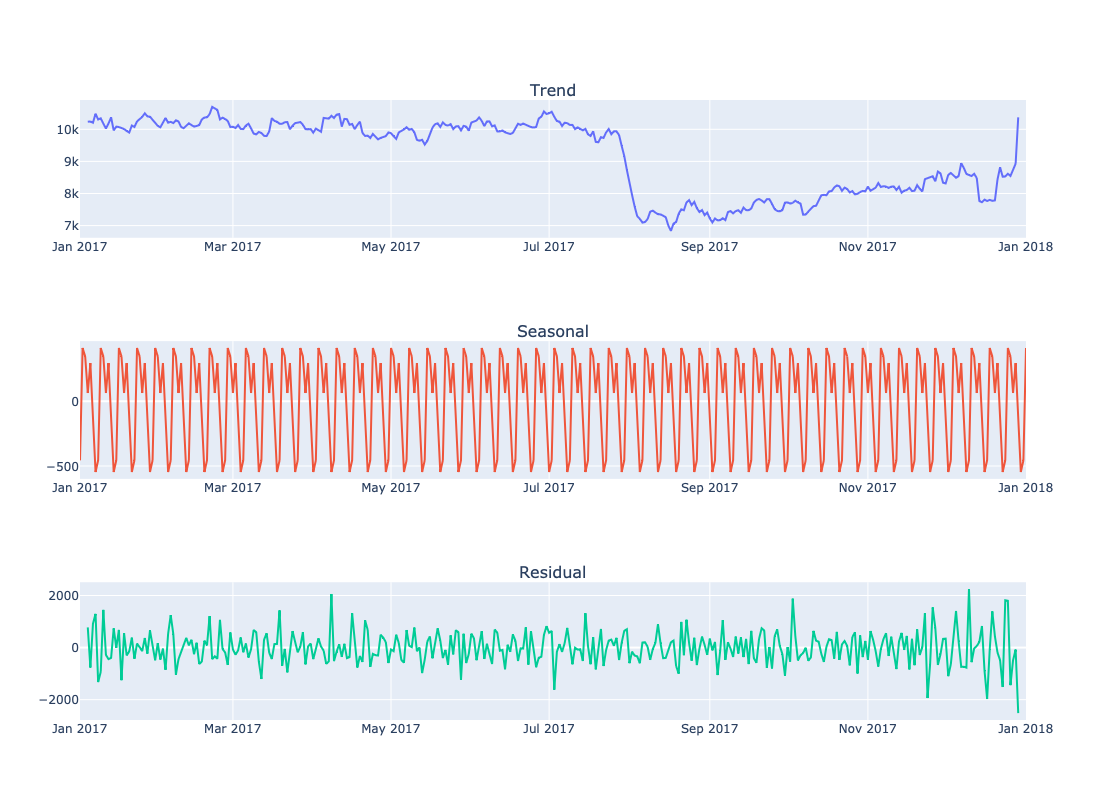

In [206]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=df2.index, y=df2[col]),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

In [207]:
df2["Seasonal Difference"] = df2['Total Duration'].diff(14)

In [215]:
df2.head()

Total Duration         Trend    Seasonal    Residual  \
Date                                                               
2017-01-01     8470.030303           NaN -456.295040         NaN   
2017-01-02    10093.765766           NaN  411.249691         NaN   
2017-01-03    10001.776119           NaN  346.522648         NaN   
2017-01-04    11074.641221  10236.232086   63.995572  774.413564   
2017-01-05     9771.063291  10243.900735  294.941429 -767.778873   

            Seasonal Difference  
Date                             
2017-01-01                  NaN  
2017-01-02                  NaN  
2017-01-03                  NaN  
2017-01-04                  NaN  
2017-01-05                  NaN

In [208]:
#df2_monthly[["GreenHouseGasSaved (kg)", "seasonal_difference"]].head(16)

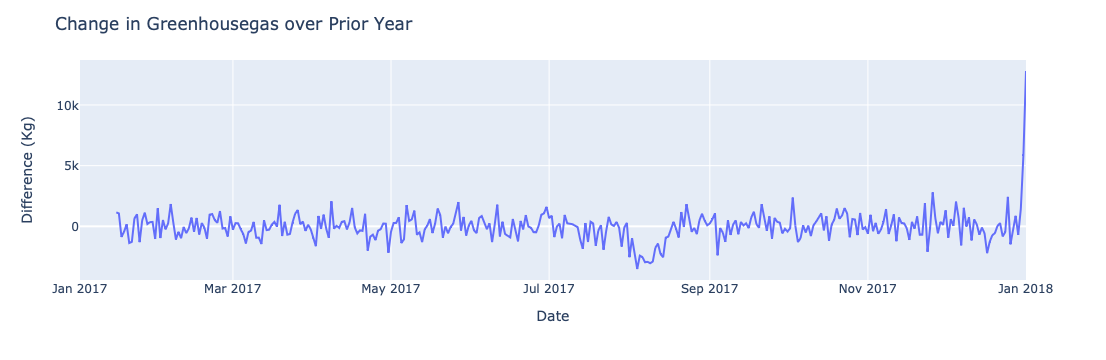

In [209]:
fig = px.line(df2, x=df2.index, y="Seasonal Difference")

fig.update_layout(
    yaxis_title="Difference (Kg)", 
    xaxis_title="Date",
    title="Change in Greenhousegas over Prior Year"
)

fig.show()

In [219]:
# Assuming df2.index is not a DatetimeIndex, convert it if needed
if not isinstance(df2.index, pd.DatetimeIndex):
    df2.index = pd.to_datetime(df2.index)

# Now, you can use the datetime.date method
date_threshold = datetime.strptime("2017-01-01", "%Y-%m-%d").date()

# Assuming df2.index is a datetime index
train = df2.loc[df2.index.date <= date_threshold, "Seasonal Difference"].dropna()
test = df2.loc[df2.index.date > date_threshold, "Seasonal Difference"].dropna()

# Display the resulting train and test sets
print("Train Set:")
print(train.head())

print("\nTest Set:")
print(test.head())



Train Set:
Series([], Name: Seasonal Difference, dtype: float64)

Test Set:
Date
2017-01-15    1148.333333
2017-01-16    1066.807764
2017-01-17    -870.385315
2017-01-18    -446.414228
2017-01-19     171.384562
Name: Seasonal Difference, dtype: float64


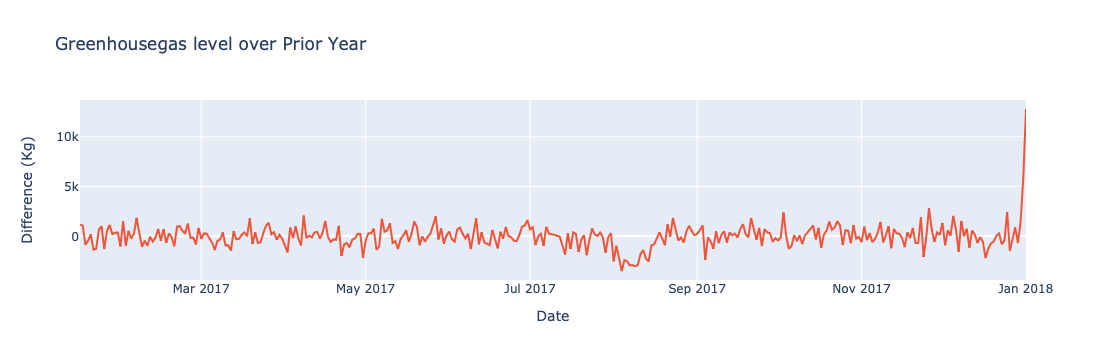

In [220]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.update_layout(
    yaxis_title="Difference (Kg)", 
    xaxis_title="Date",
    title="Greenhousegas level over Prior Year"
)
fig.show()

In [221]:
full_index = pd.concat([train, test]).index
base_line = np.full(full_index.shape, np.mean(train))

predictions = pd.Series(data=base_line, index=full_index)

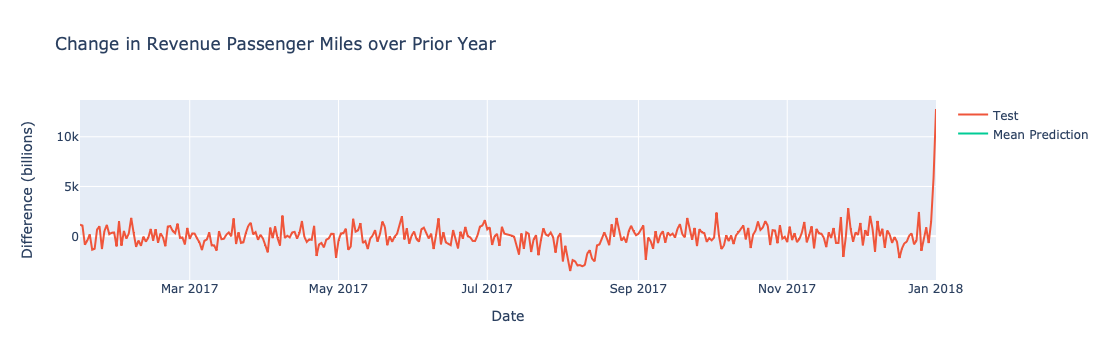

In [222]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Mean Prediction"))

fig.update_layout(
    yaxis_title="Difference (billions)", 
    xaxis_title="Date",
    title="Change in Revenue Passenger Miles over Prior Year"
)
fig.show()

In [223]:
def mean_absolute_percentage_error(true_values, predicted_values):
    """
    Calculate the mean absolute percentage error. 
    Find the prediction error and devide by the true value, then average.
    """
    
    error = true_values - predicted_values
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    
    return mape

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: nan%
Test MAPE on the difference: nan%


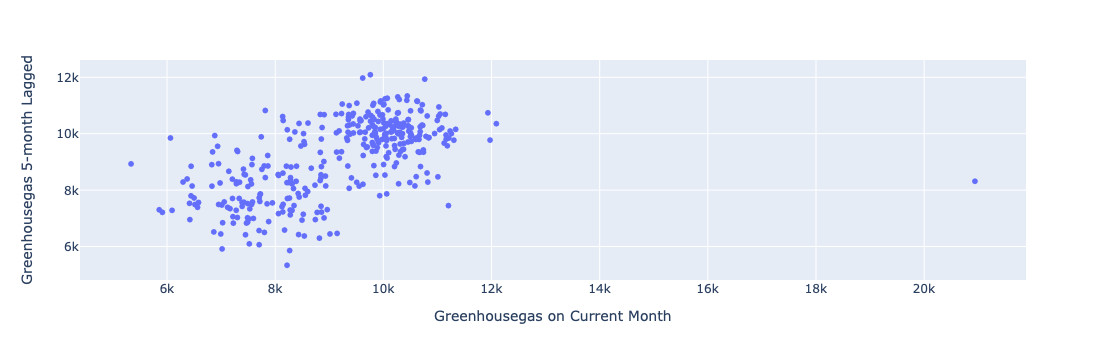

In [225]:
fig = px.scatter(
    x=df2["Total Duration"], 
    y=df2["Total Duration"].shift(5) # 3-month lagged observations
)
fig.update_layout(
    xaxis_title="Greenhousegas on Current Month", 
    yaxis_title="Greenhousegas 5-month Lagged"
)
fig.show()

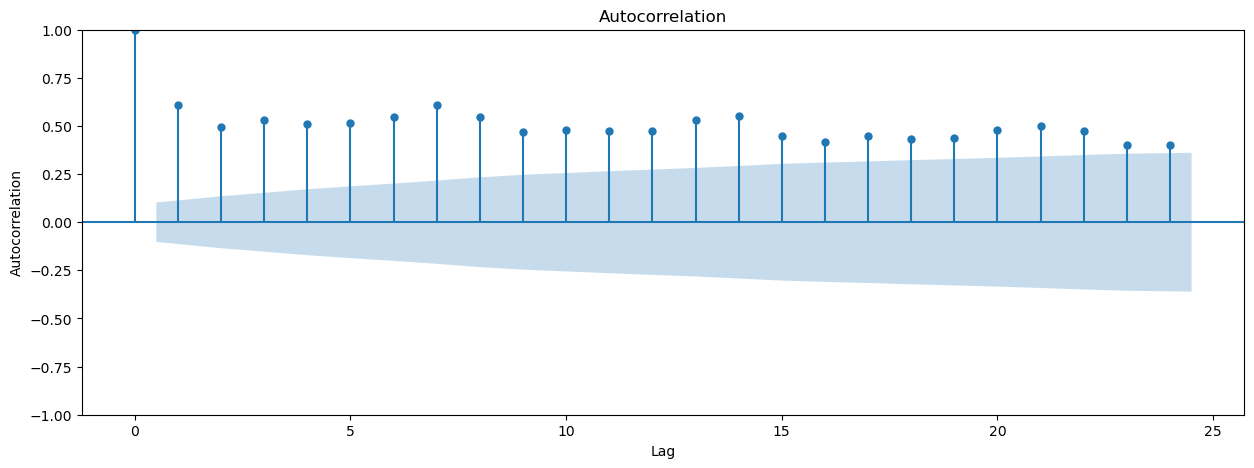

In [230]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

# put the acf plot on the current axis
plot_acf(df2["Total Duration"], lags=24, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

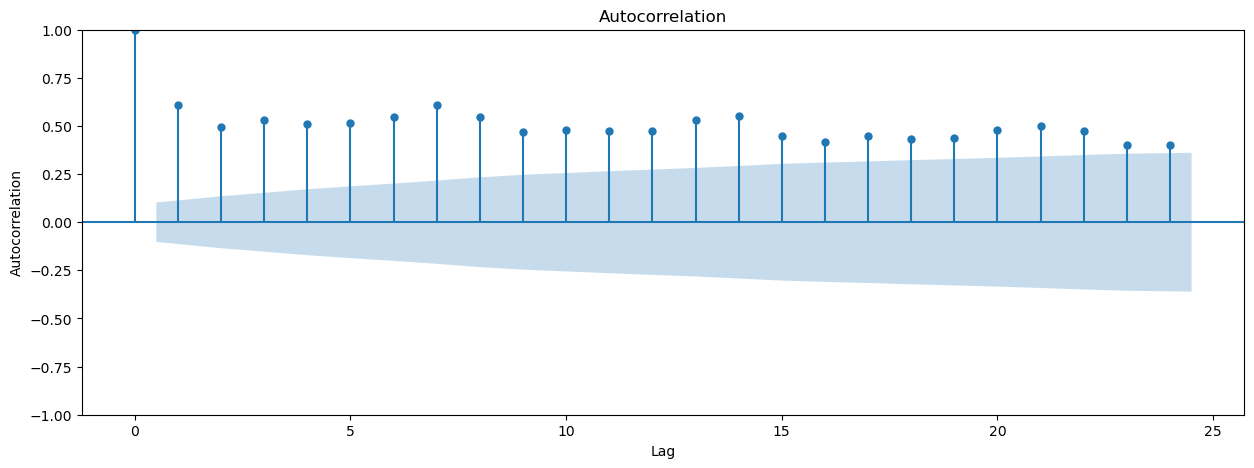

In [231]:
plt.figure(figsize=(15, 5))
plot_acf(df2["Total Duration"].dropna(), lags=24, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

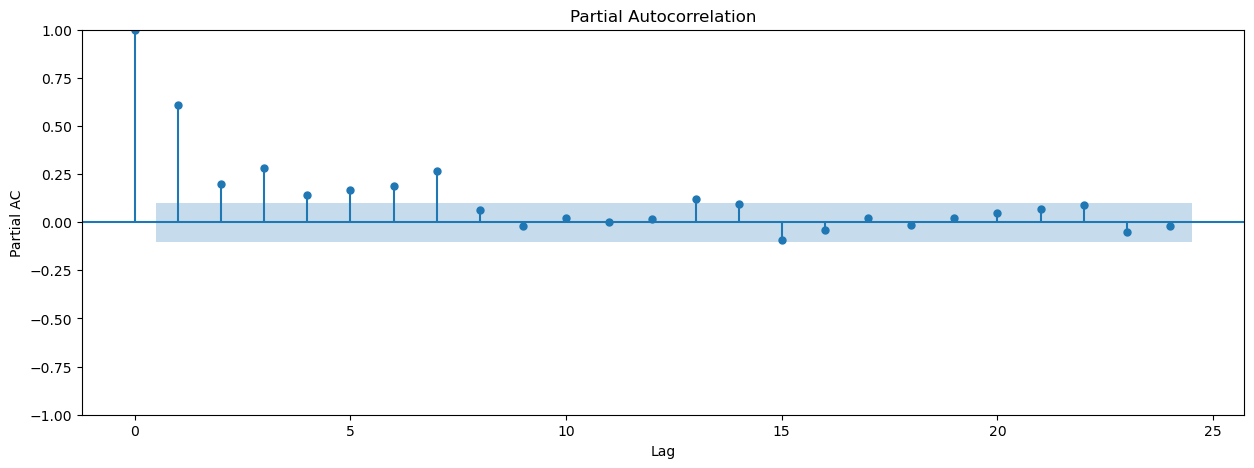

In [233]:
plt.figure(figsize=(15, 5))
plot_pacf(df2["Total Duration"].dropna(), lags=24, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial AC')
plt.show()

In [121]:
predictions = model_fit.predict(start=0, end=len(train)+len(test)-1)

In [122]:
predictions.head()

2012-07-01    3279.553805
2012-08-01    1587.223091
2012-09-01    1358.965215
2012-10-01    1145.568583
2012-11-01     823.664345
Freq: MS, Name: predicted_mean, dtype: float64

In [123]:
predictions.index.min()

Timestamp('2012-07-01 00:00:00')

In [124]:
betas = model_fit.params
betas

intercept       143.899232
ar.L1             1.096572
ar.L2            -0.140449
sigma2       434324.050583
dtype: float64

In [125]:
# set the index for the prediction
current_idx = 2

print(f"Prediction by the model: {predictions[current_idx]}\n") 

print(f'Prediction by applying the formula: \
      {betas["intercept"] + betas["ar.L1"]*train[current_idx-1] + betas["ar.L2"]*train[current_idx-2]}') 

Prediction by the model: 1358.9652153236416

Prediction by applying the formula:       1358.9652153236416


In [126]:
train.index.max()

Timestamp('2017-01-01 00:00:00')

In [127]:
model_fit.forecast(steps=5)

2017-02-01    4546.118624
2017-03-01    4465.057692
2017-04-01    4401.655559
2017-05-01    4343.515535
2017-06-01    4288.665620
Freq: MS, Name: predicted_mean, dtype: float64

In [128]:
predictions[len(train): len(train)+5]

2017-02-01    4546.118624
2017-03-01    4465.057692
2017-04-01    4401.655559
2017-05-01    4343.515535
2017-06-01    4288.665620
Freq: MS, Name: predicted_mean, dtype: float64

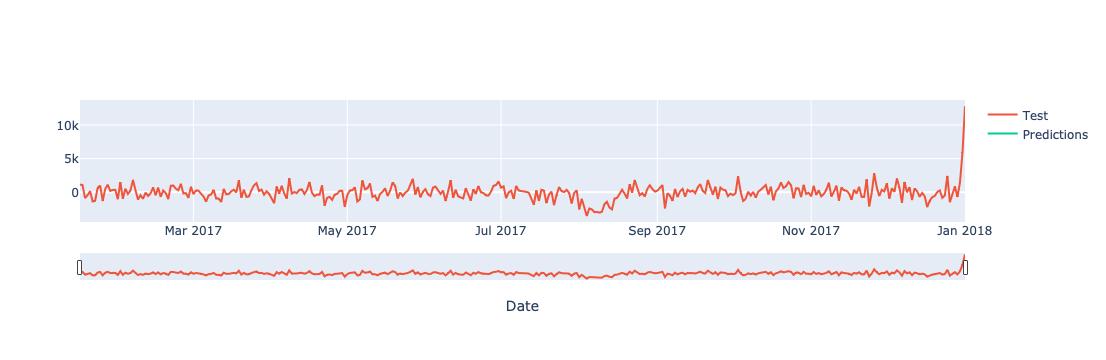

In [234]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Predictions"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    
    xaxis_title="Date",
    
)
fig.show()

In [130]:
train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 38.04%
Test MAPE on the difference: 101.22%


After evaluating the logistic regression model's performance and gaining insights from the initial analysis, the next phase of the project involves advanced modeling and a deeper exploration of the dataset. Specifically, I want to find average wait period for each stations in Palo Alto and create dashboard so that both users and business owners are aware of the wait time.

The concluding phase involves completing the construction of the time series model and delivering a comprehensive presentation. This presentation aims to elucidate any discernible trends, patterns, and seasonality observed in the context of electric vehicle EV charging stations. Additionally, a thorough examination will be undertaken to expound upon the reasons underlying the ineffectiveness of models such as Ridge and Lasso regression in this particular scenario. The objective is to provide a nuanced understanding of the dynamics influencing EV charging station behavior, thereby enhancing the overall insights derived from the modeling efforts.

